In [1]:
from pathlib import Path
import sys
import json
import datetime

PROJ_DIR = Path.cwd().parent.parent
sys.path.append(str(PROJ_DIR))

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import animation
import matplotlib.font_manager as fm
from IPython.display import HTML
fm.fontManager.addfont('../resources/arial.ttf')

import numpy as np
import pandas as pd

from src.defaults import ROOT_DIR
from src.checkpoint import CheckpointableData, Checkpointer
from src.config import BaseConfig, Require
from src.shared import get_env
from src.smbpo import SMBPO
from src.tester import Tester
from src.viz_tracking.opt_controller import OptController

ROOT_DIR = Path(ROOT_DIR)
assert ROOT_DIR.is_dir(), ROOT_DIR
LOGS_DIR = ROOT_DIR / 'logs' / 'tracking'

params = {
    'font.family': 'Arial',
    'font.serif': 'Arial',
    # 'font.style': 'italic',
    # 'font.weight': 'normal', #or 'blod'
    'font.size': 15,  # or large,small
    'animation.ffmpeg_path': r'/usr/bin/ffmpeg'
}
rcParams.update(params)

class Config(BaseConfig):
    env_name = "tracking"
    env_cfg = {
        "pre_horizon" : 10,
        "surr_veh_num" : 1,
    }
    seed = 1
    epochs = 600
    alg_cfg = SMBPO.Config()
    alg = 'DRPO'
    opt_args = {
        "num_pred_step": 20,
        "gamma": 0.99,
        "mode": "shooting",
        "minimize_options": {
            "max_iter": 200,
            "tol": 1e-3,
            "acceptable_tol": 1e-2,
            "acceptable_iter": 50,
            # "print_level": 5,
        },
        "use_terminal_cost": False,
        "verbose": 1,
    }

/home/yudongjie/anaconda3/envs/smbrl/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/yudongjie/safe_proj/safe-control-gym/safe_control_gym/utils/configuration.py:72: UserWarning: No agent/task config given.
  warnings.warn("No agent/task config given.")
/home/yudongjie/anaconda3/envs/smbrl/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Test log directory: /home/yudongjie/safe_proj/Safe_MBRL/logs/tracking/02-25-23_13.47.32_DRPO_22/MPC
env <SimuVeh3dofcontiSurrCstr2 instance>
surr 0: d_lon: 8, d_lat: 3.5, u: 4.5

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 9
* Cost function calls: 11
* Constraint calls: 24
* System simulations: 35
* Final cost: 0.8779303431510925 



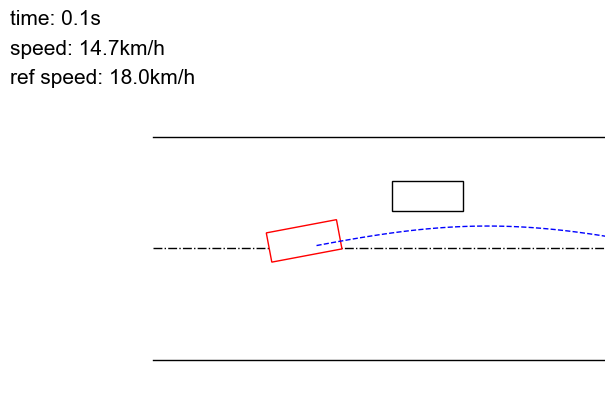

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.8614420294761658 



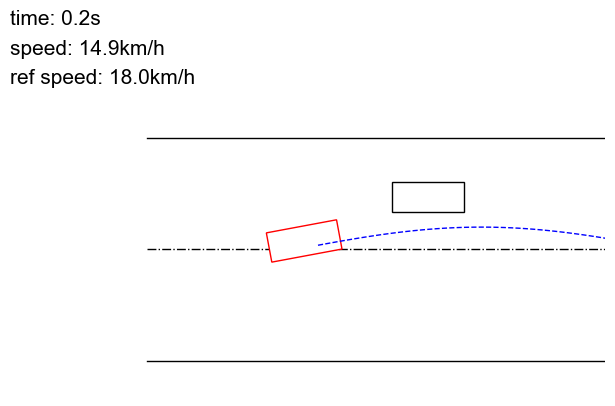

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.8465277552604675 



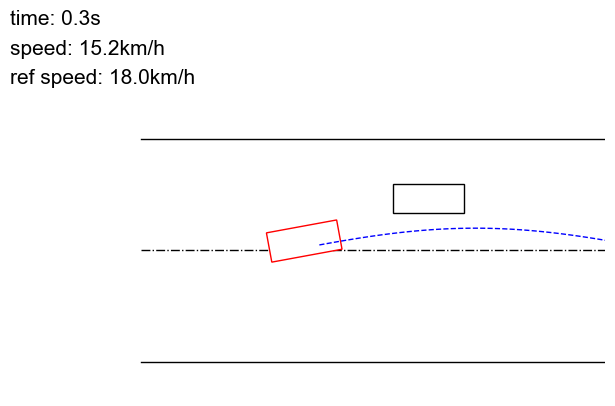

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.8322649598121643 



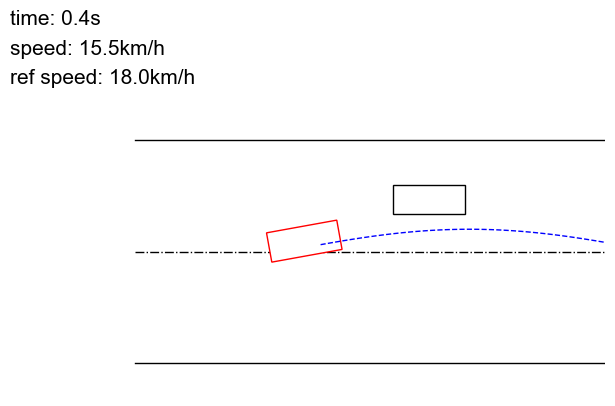

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.8179485201835632 



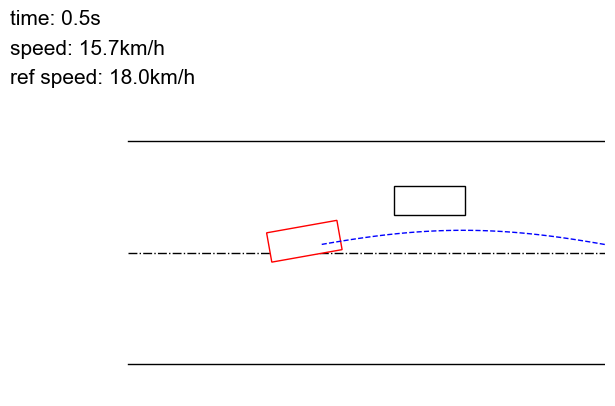

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.8030064105987549 



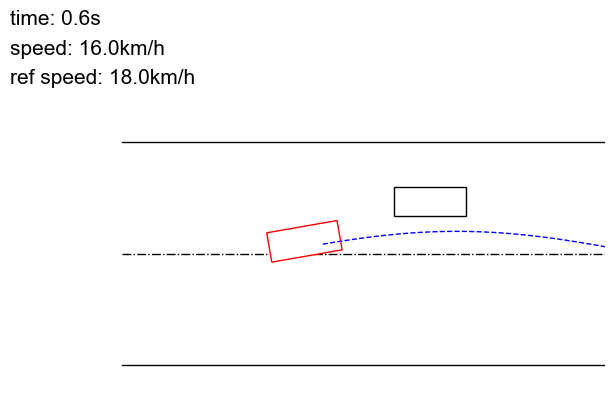

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 9
* Constraint calls: 20
* System simulations: 29
* Final cost: 0.7870538234710693 



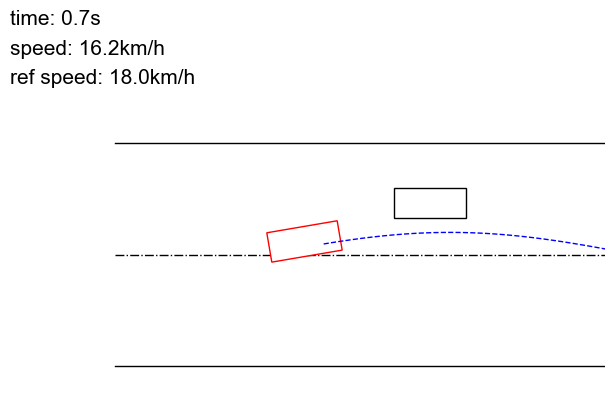

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.769827127456665 



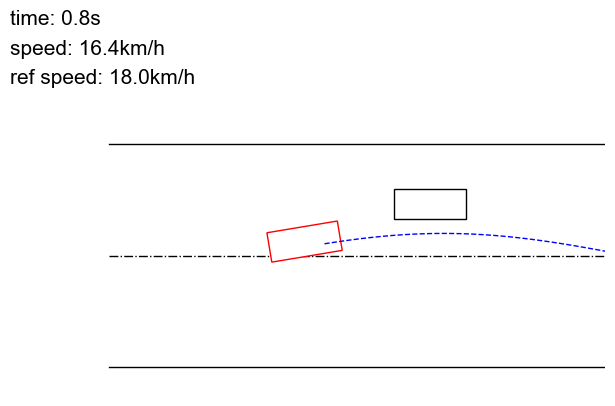

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.7511627674102783 



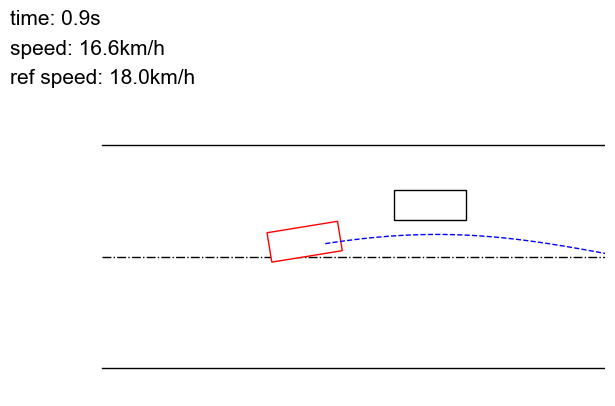

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.7309728860855103 



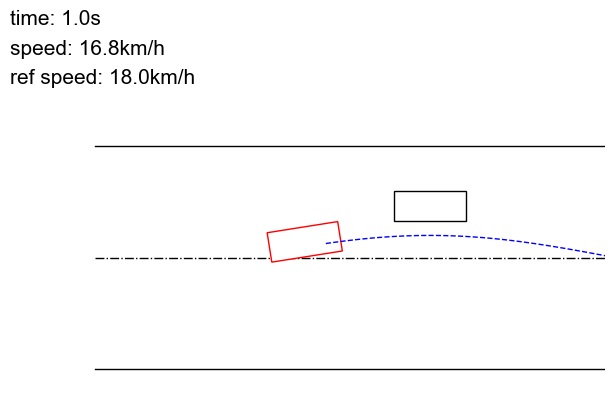

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.7092574834823608 



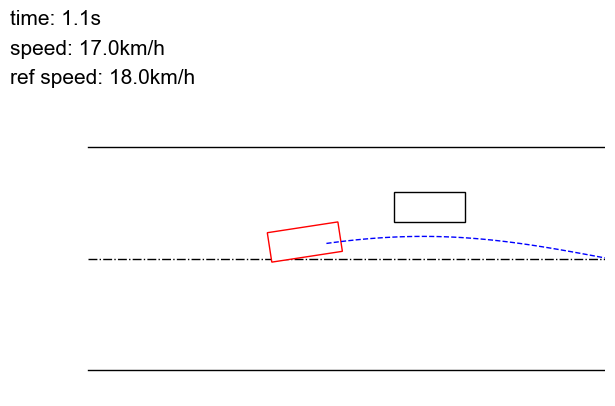

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 7
* Constraint calls: 16
* System simulations: 23
* Final cost: 0.6860803961753845 



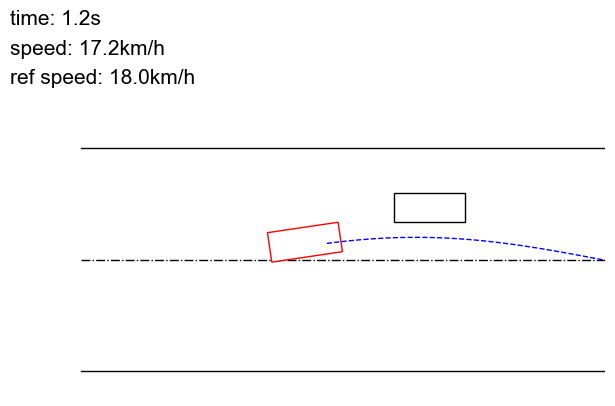

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 7
* Constraint calls: 16
* System simulations: 23
* Final cost: 0.6614725589752197 



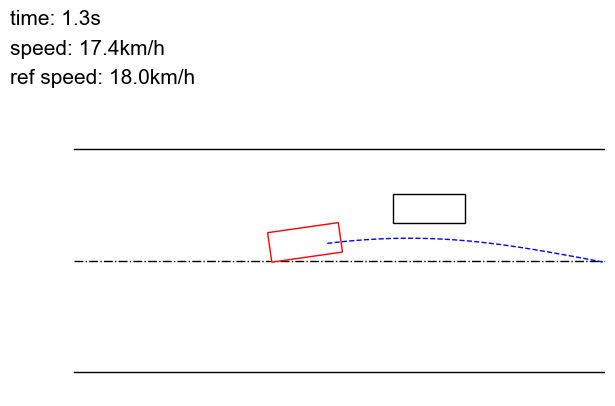

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.6356682777404785 



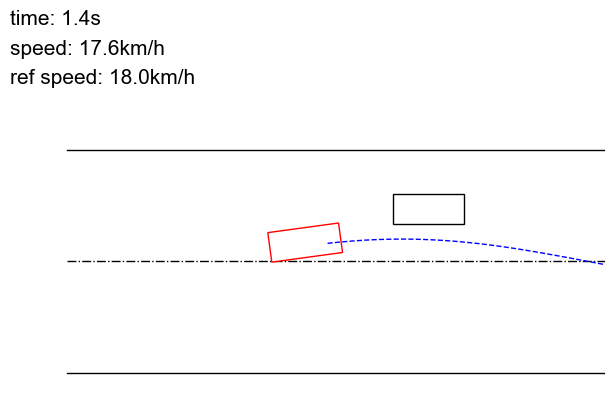

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.6088632345199585 



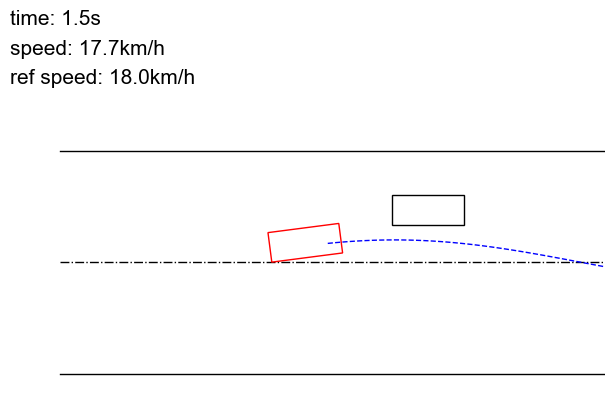

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.5812654495239258 



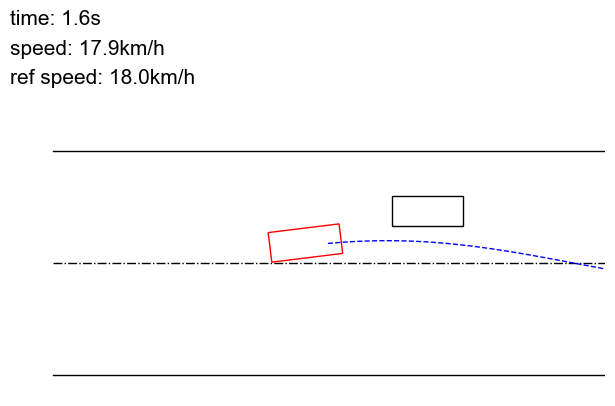

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.5530728697776794 



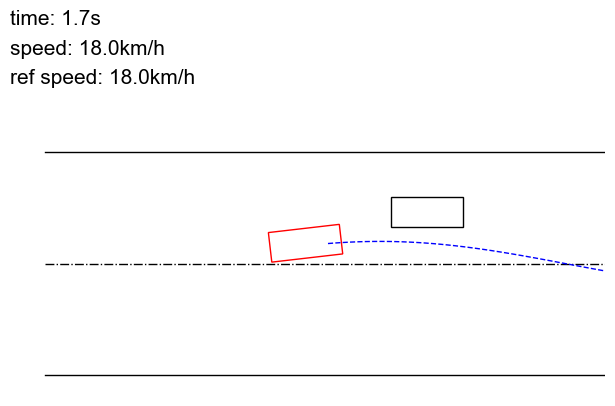

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.5245164632797241 



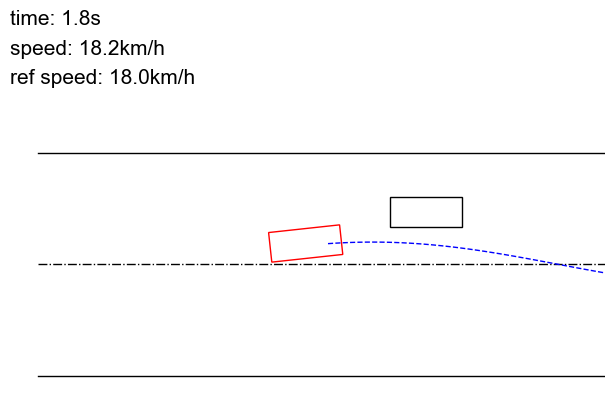

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.4958363473415375 



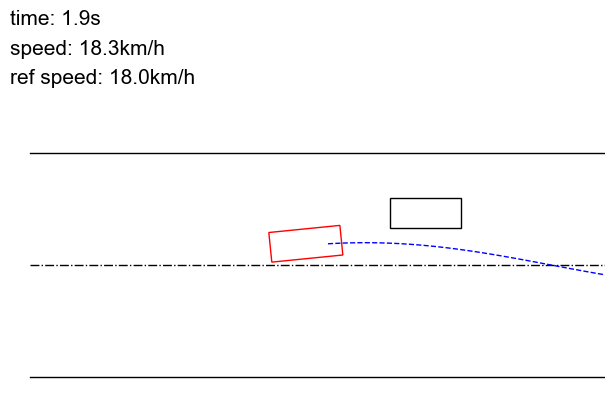

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.4672256410121918 



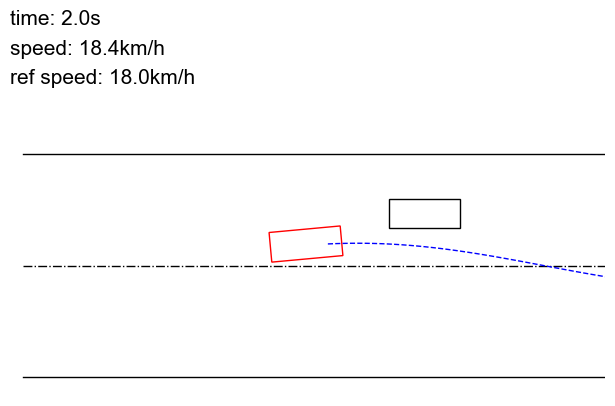

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.4388740658760071 



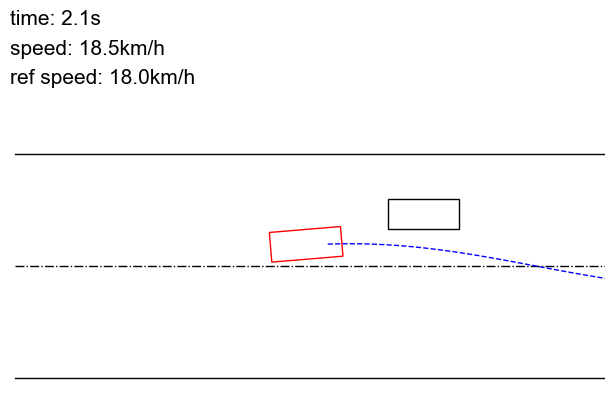

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.41096171736717224 



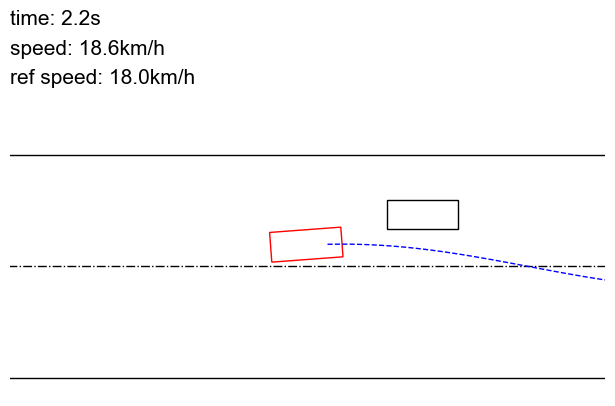

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 7
* Constraint calls: 16
* System simulations: 23
* Final cost: 0.38370999693870544 



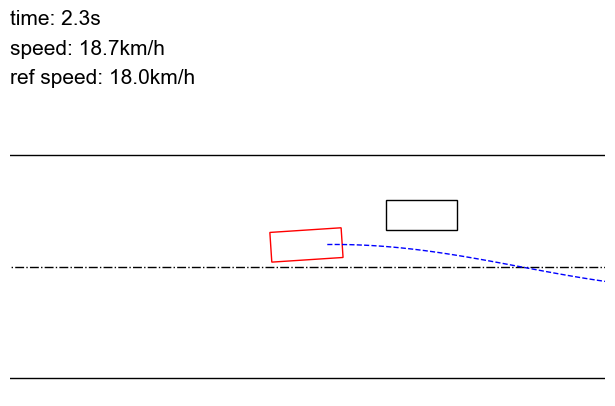

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.3572138547897339 



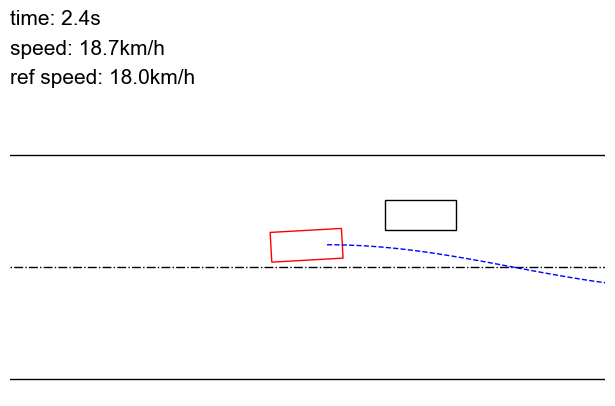

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.3317057192325592 



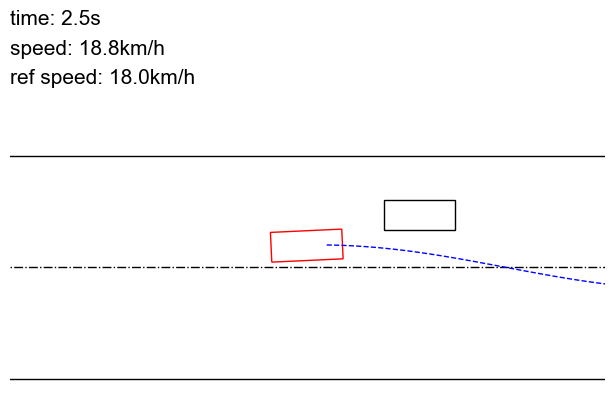

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 7
* Constraint calls: 16
* System simulations: 23
* Final cost: 0.3070959150791168 



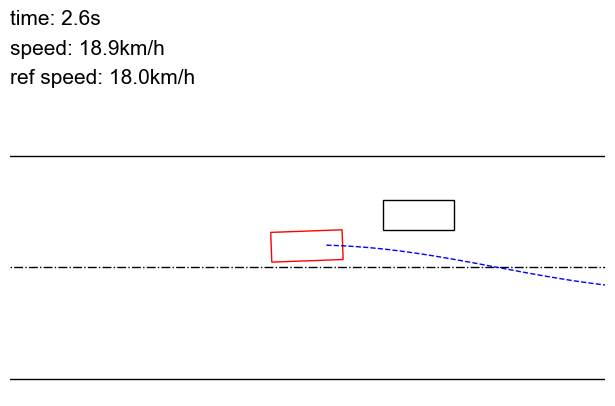

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 7
* Constraint calls: 16
* System simulations: 23
* Final cost: 0.2835204005241394 



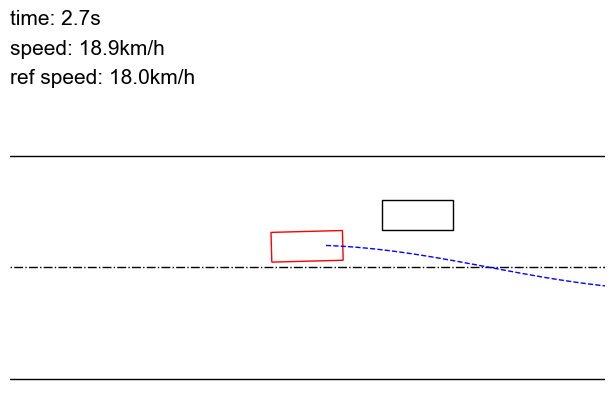

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 7
* Constraint calls: 16
* System simulations: 23
* Final cost: 0.26103317737579346 



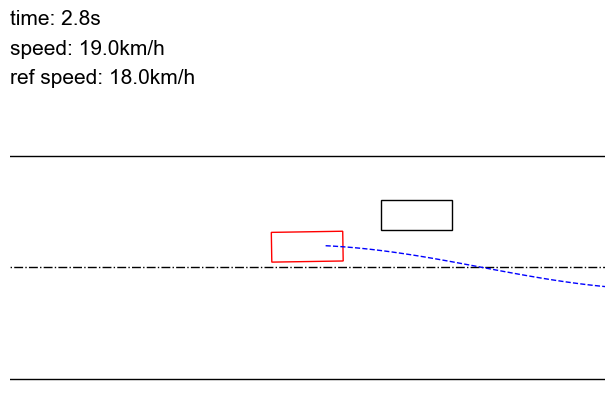

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 7
* Constraint calls: 16
* System simulations: 23
* Final cost: 0.2396877110004425 



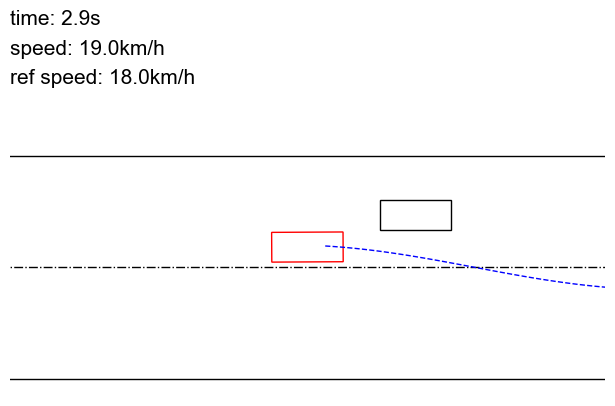

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 7
* Constraint calls: 16
* System simulations: 23
* Final cost: 0.21951036155223846 



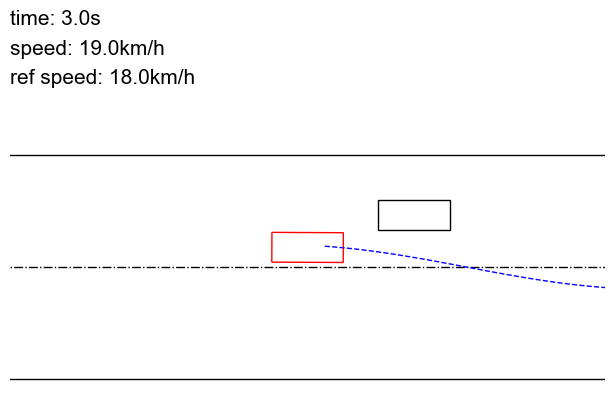

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 7
* Constraint calls: 16
* System simulations: 23
* Final cost: 0.20050789415836334 



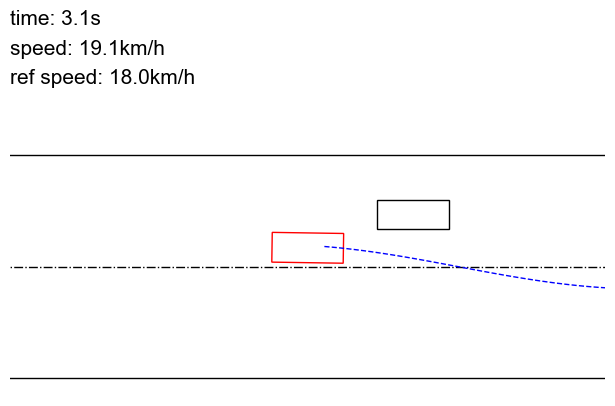

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.1827089488506317 



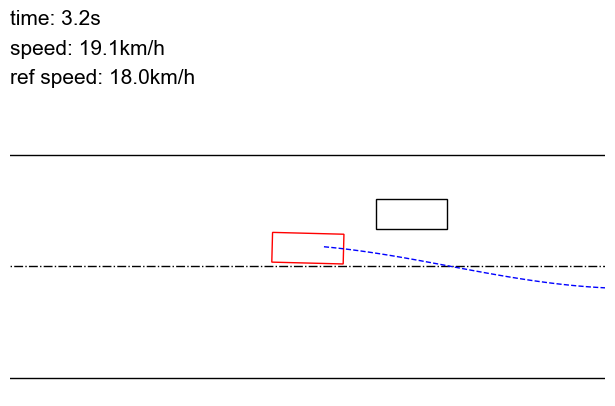

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.16610682010650635 



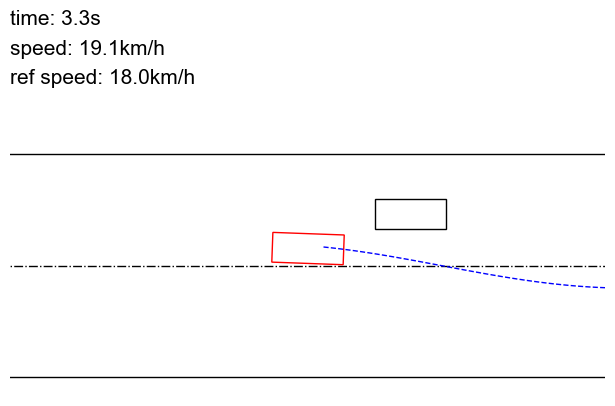

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.15065984427928925 



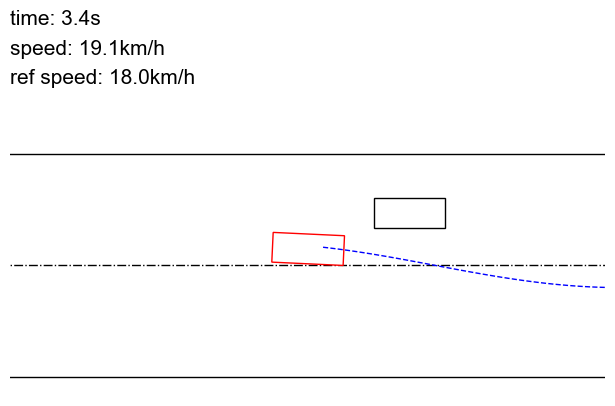

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.13627713918685913 



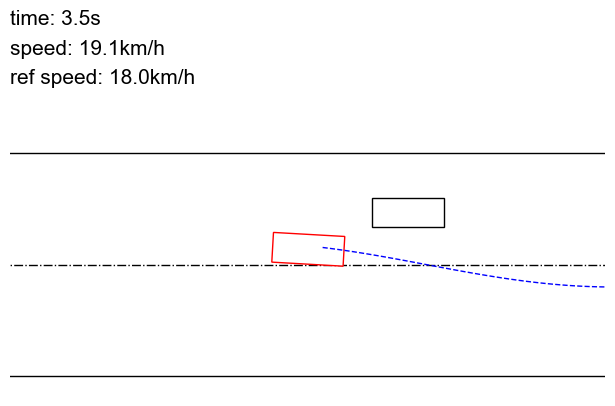

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.12301875650882721 



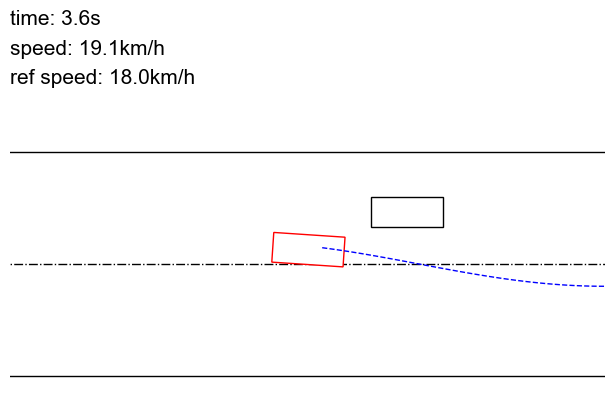

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.11078646034002304 



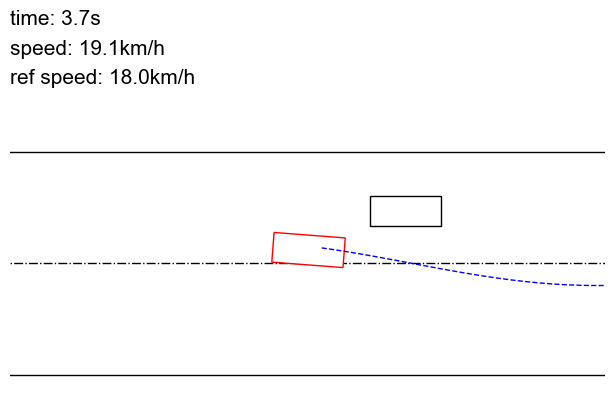

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.09959334135055542 



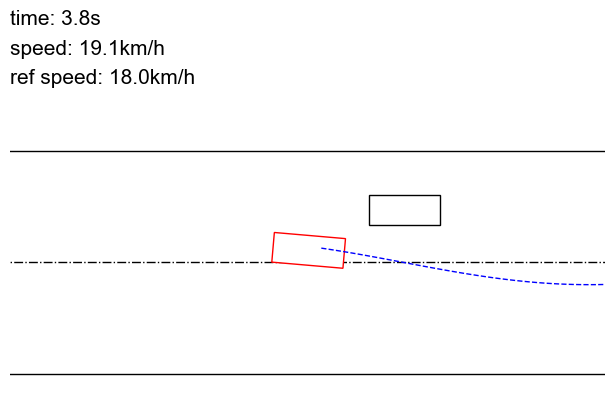

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 7
* Constraint calls: 16
* System simulations: 23
* Final cost: 0.08935394883155823 



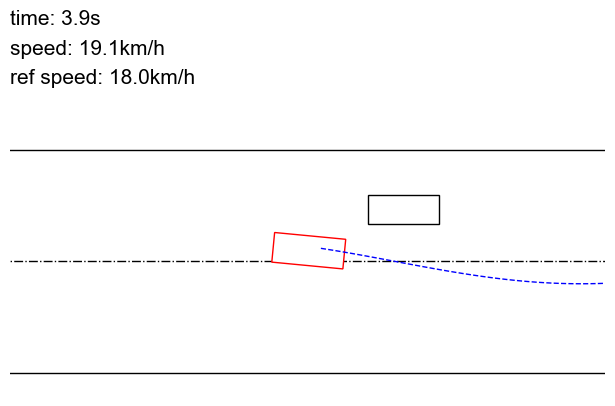

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 7
* Constraint calls: 16
* System simulations: 23
* Final cost: 0.08007295429706573 



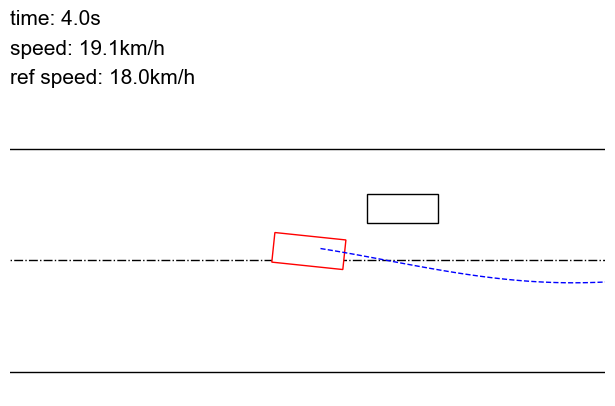

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 6
* Constraint calls: 14
* System simulations: 20
* Final cost: 0.07169852405786514 



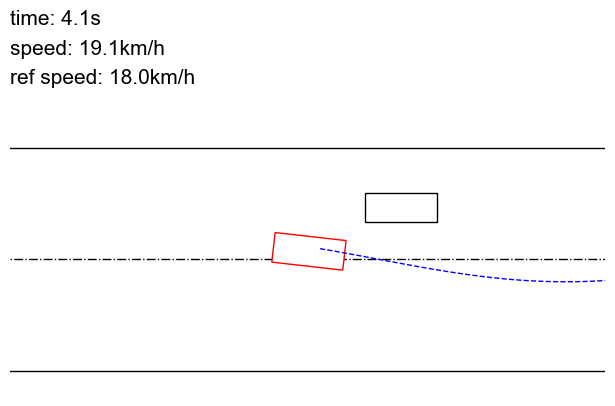

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 7
* Constraint calls: 15
* System simulations: 22
* Final cost: 0.0641554519534111 



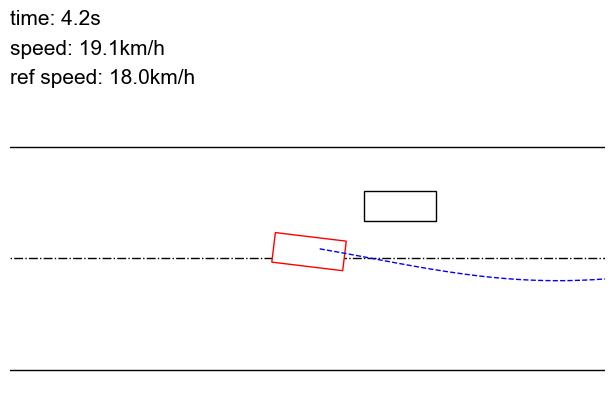

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 10
* Constraint calls: 20
* System simulations: 30
* Final cost: 0.057434823364019394 



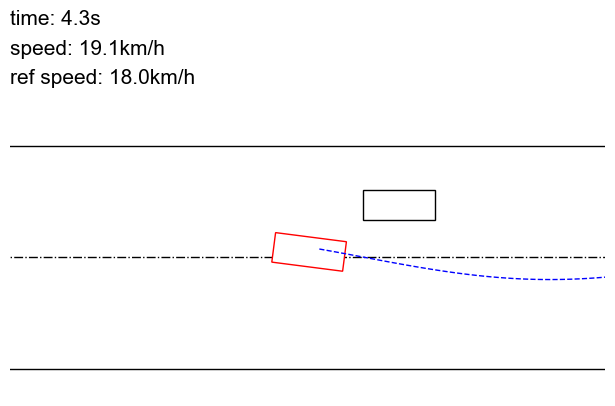

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 6
* Constraint calls: 14
* System simulations: 20
* Final cost: 0.05149000883102417 



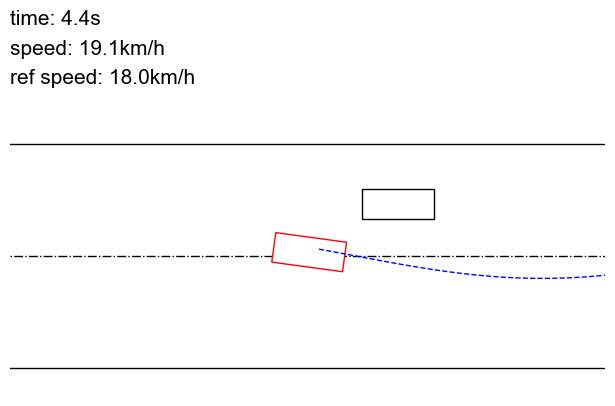

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 6
* Constraint calls: 14
* System simulations: 20
* Final cost: 0.04627874866127968 



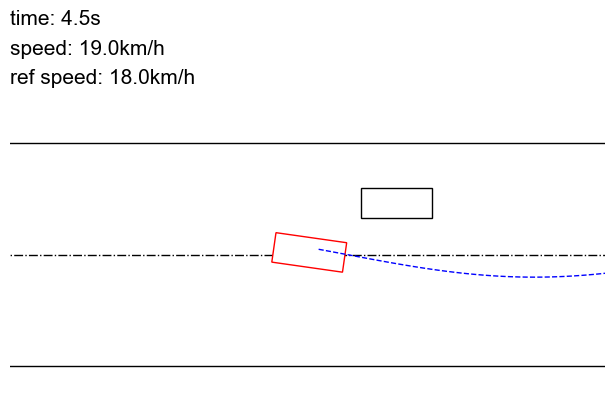

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.041792742908000946 



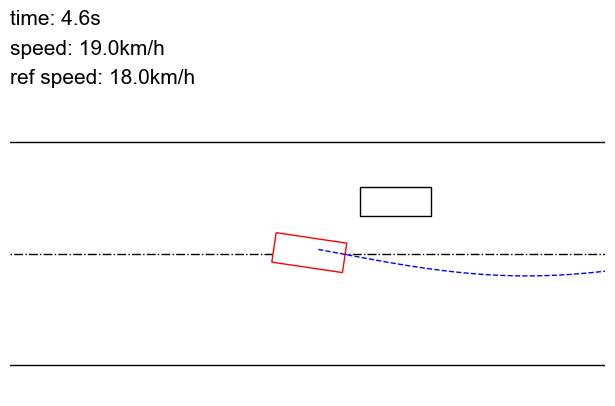

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.03796277195215225 



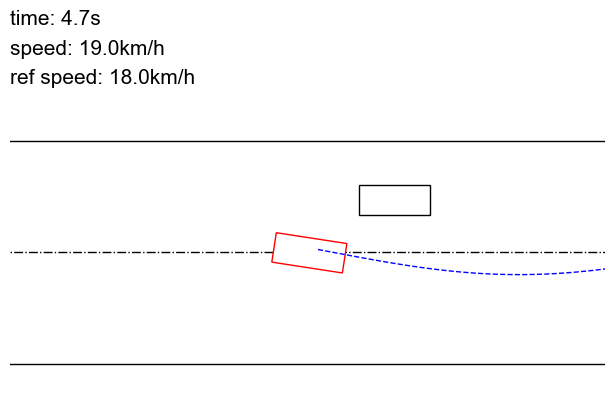

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.03476621210575104 



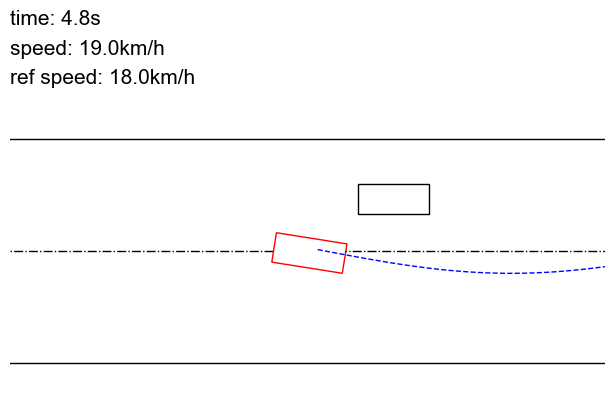

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 8
* Constraint calls: 15
* System simulations: 23
* Final cost: 0.03217142075300217 



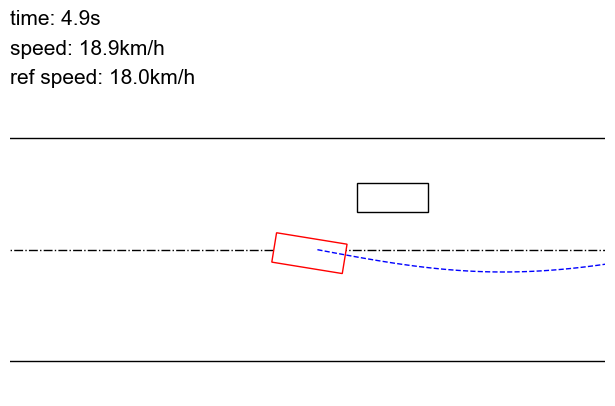

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 5
* Constraint calls: 12
* System simulations: 17
* Final cost: 0.030128471553325653 



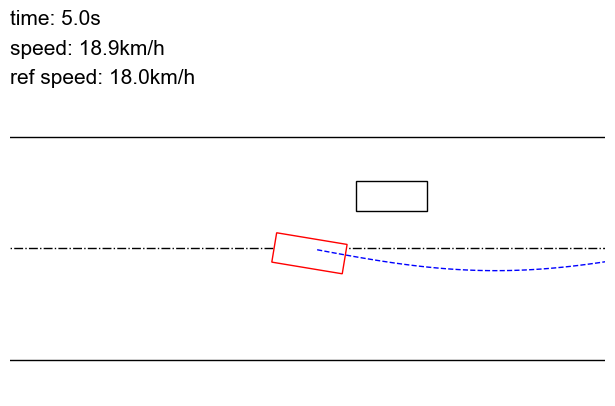

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 5
* Constraint calls: 12
* System simulations: 17
* Final cost: 0.028615117073059082 



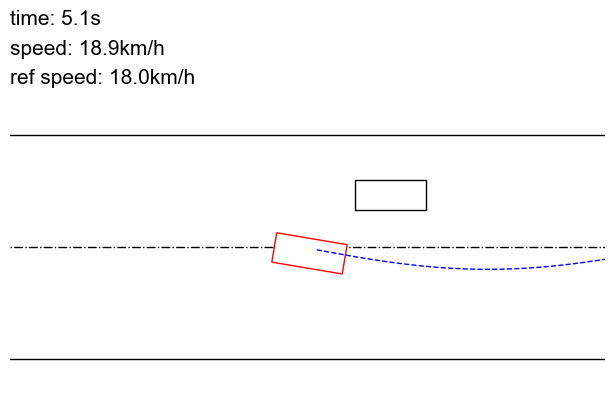

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 5
* Constraint calls: 12
* System simulations: 17
* Final cost: 0.0275980643928051 



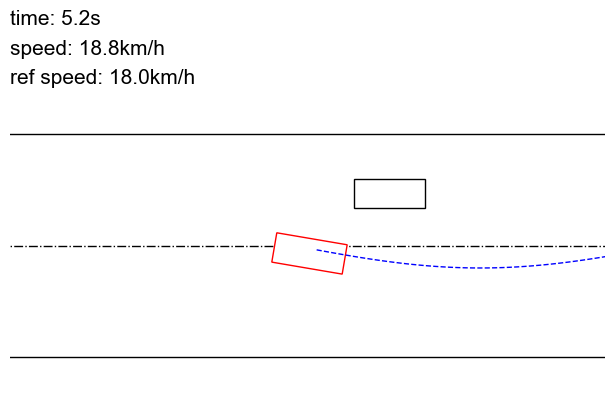

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 5
* Constraint calls: 12
* System simulations: 17
* Final cost: 0.02703993394970894 



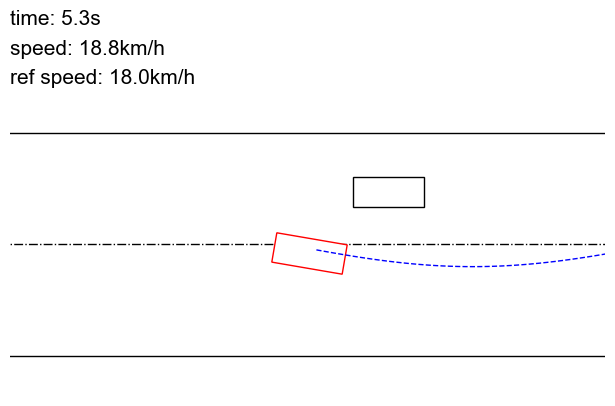

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 5
* Constraint calls: 12
* System simulations: 17
* Final cost: 0.026903700083494186 



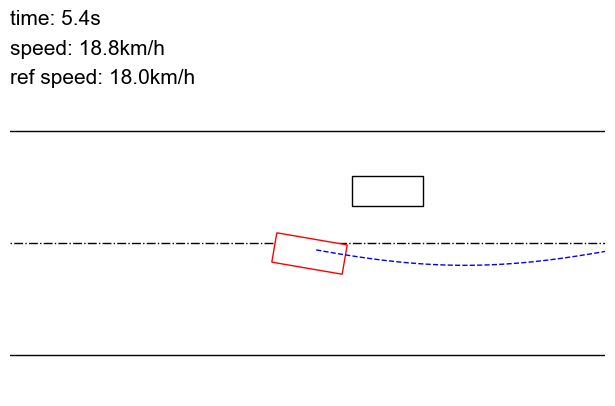

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.027149610221385956 



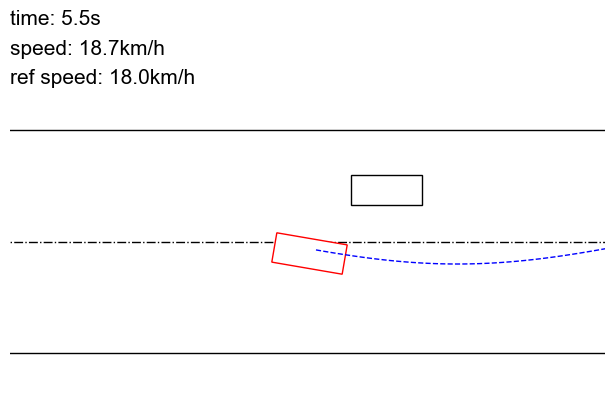

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.027736803516745567 



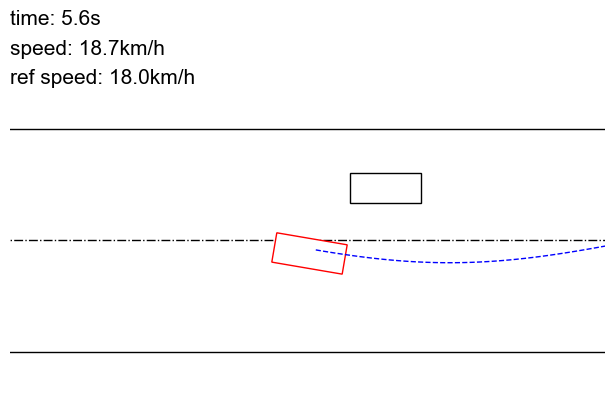

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.028621334582567215 



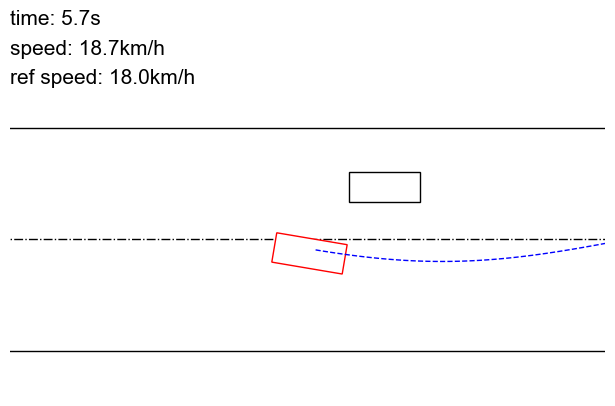

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.029755648225545883 



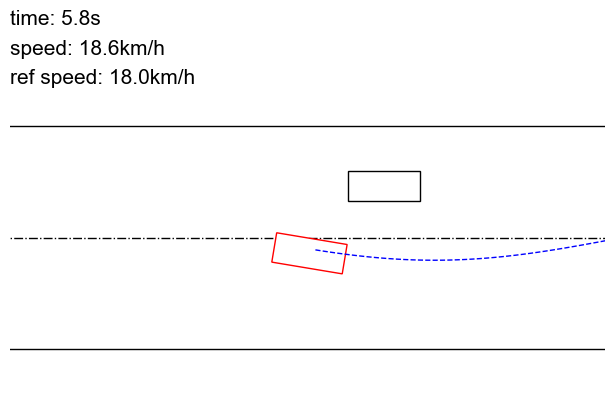

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.03111785091459751 



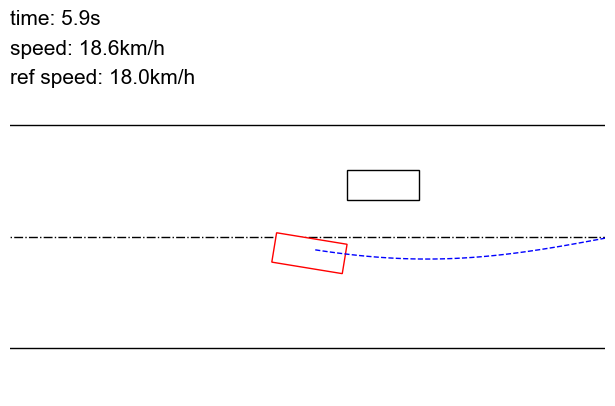

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.03264568746089935 



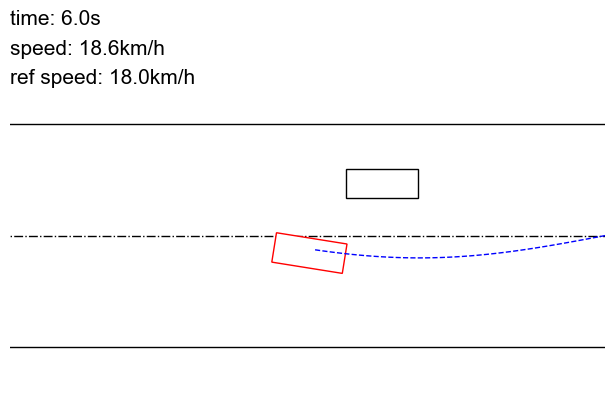

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.03428807854652405 



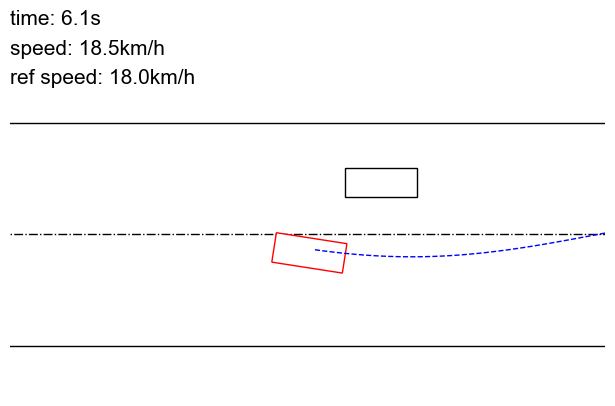

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.035997554659843445 



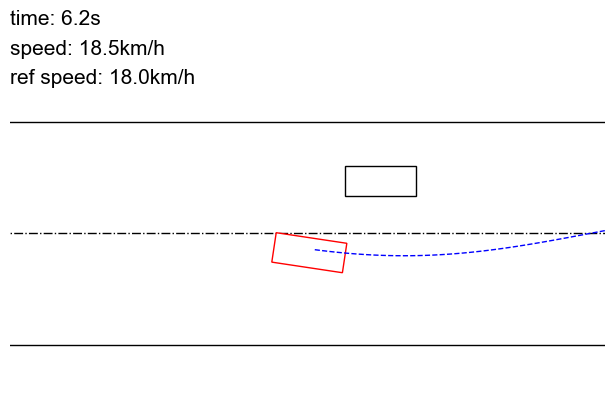

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.03772519901394844 



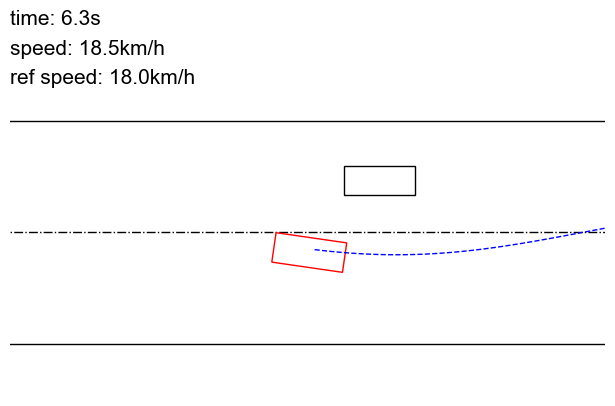

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.039422519505023956 



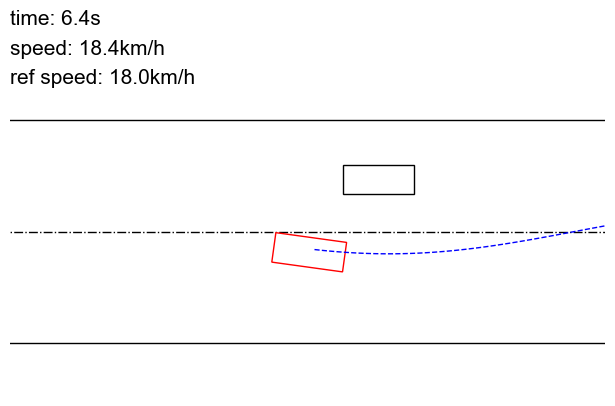

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.04104505106806755 



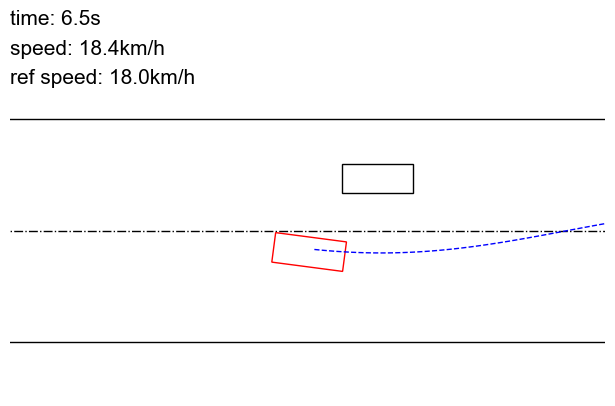

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.042549021542072296 



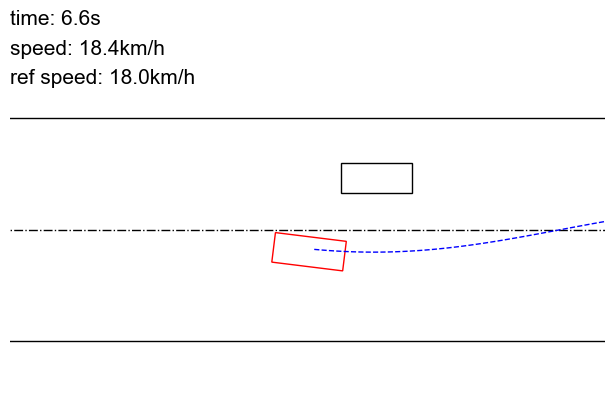

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.04389248415827751 



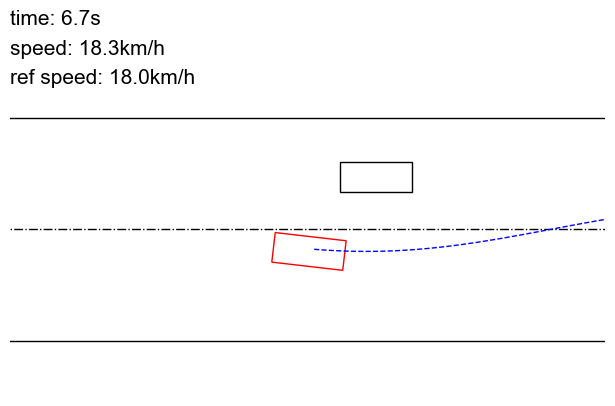

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.045038364827632904 



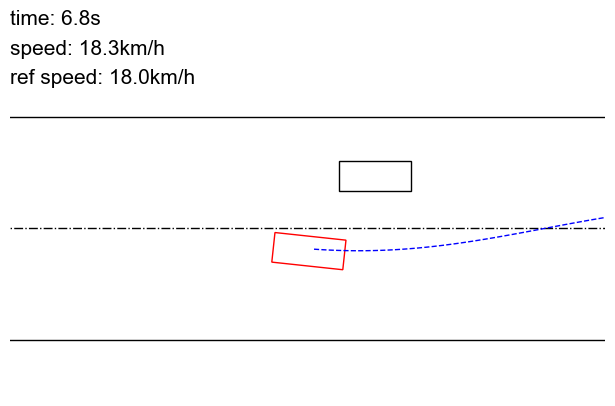

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.045952826738357544 



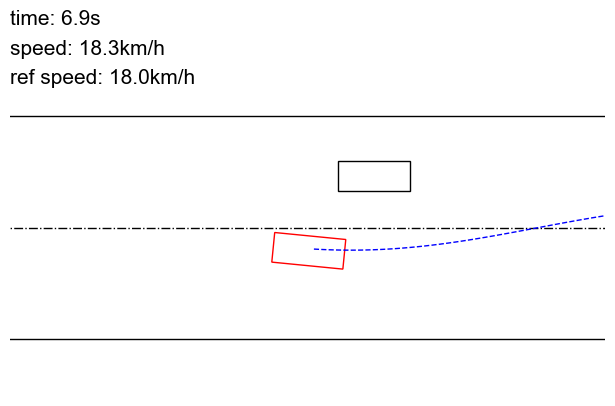

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.04660848155617714 



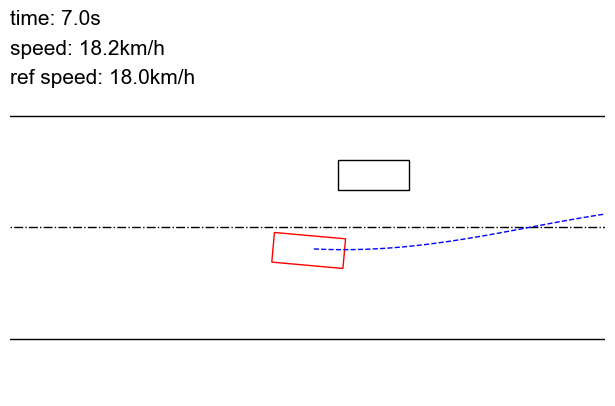

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.046982426196336746 



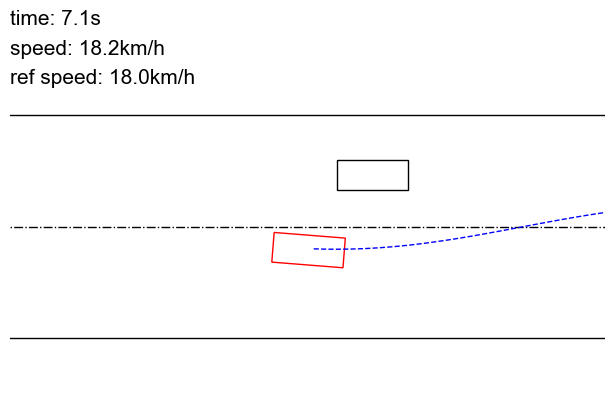

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.04705922305583954 



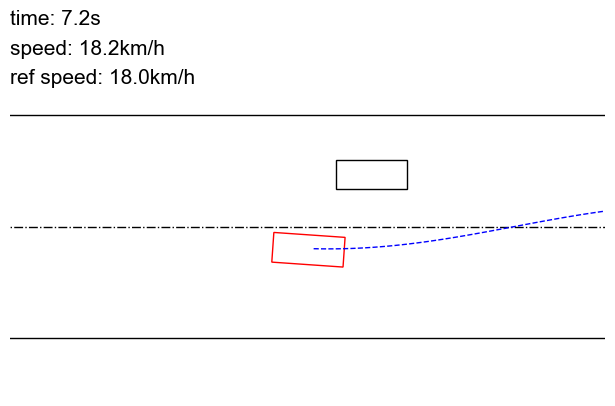

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.04682830721139908 



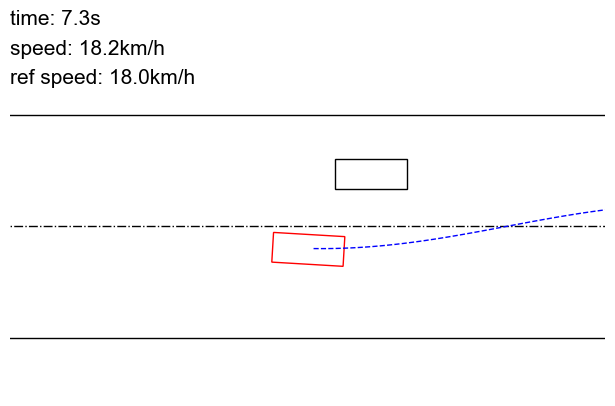

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.0462857224047184 



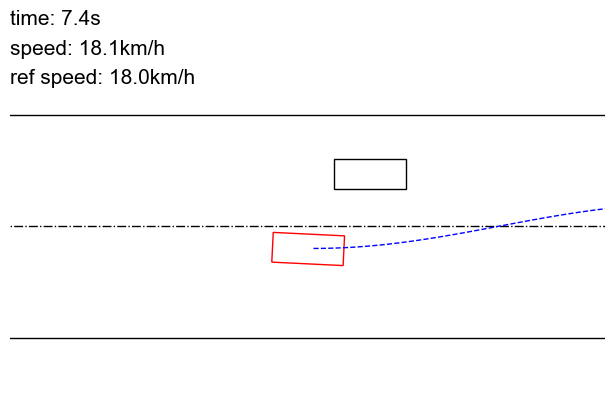

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.045431237667798996 



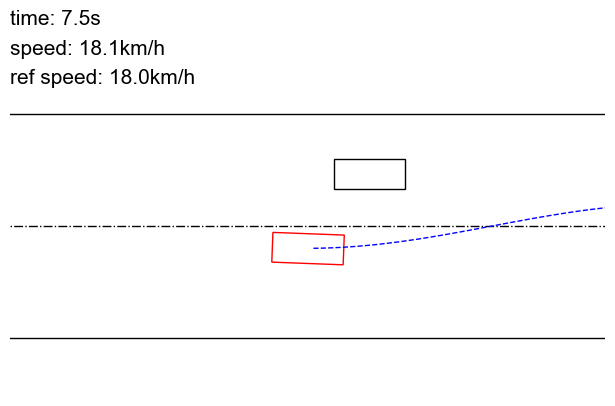

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.04428022727370262 



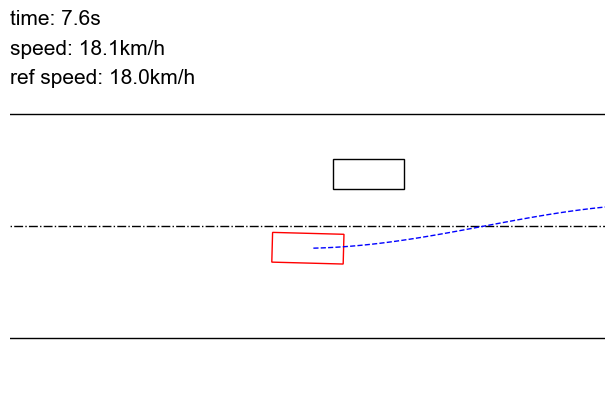

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.04288334399461746 



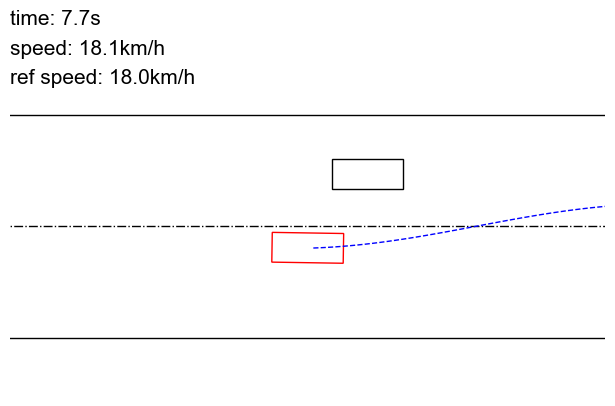

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.04116126522421837 



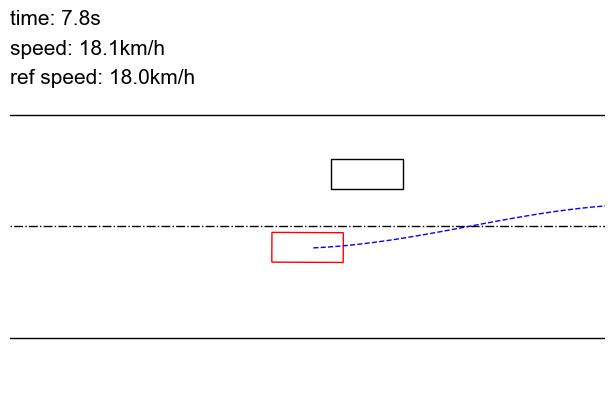

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.03922835737466812 



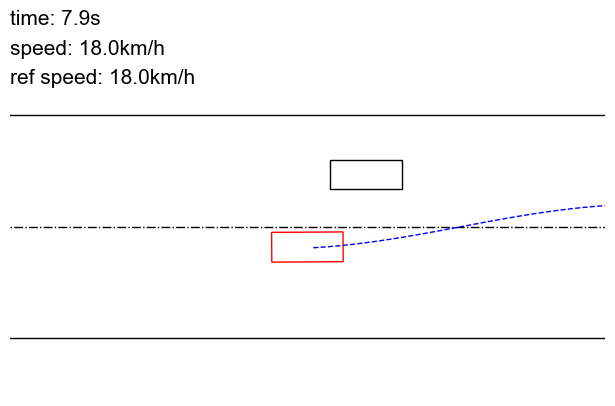

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.03708328306674957 



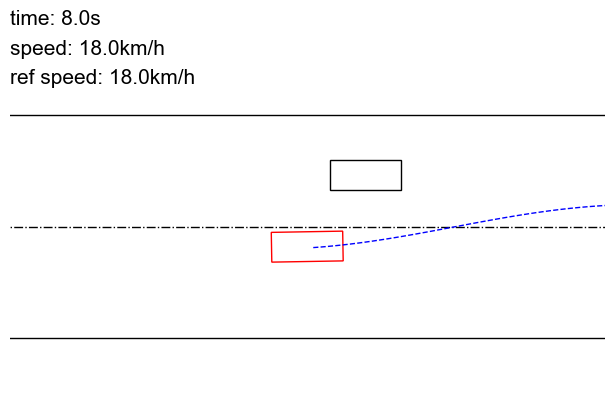

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.03478197380900383 



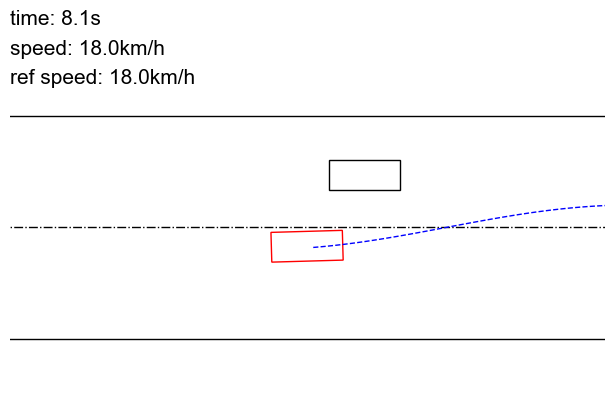

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.03234732896089554 



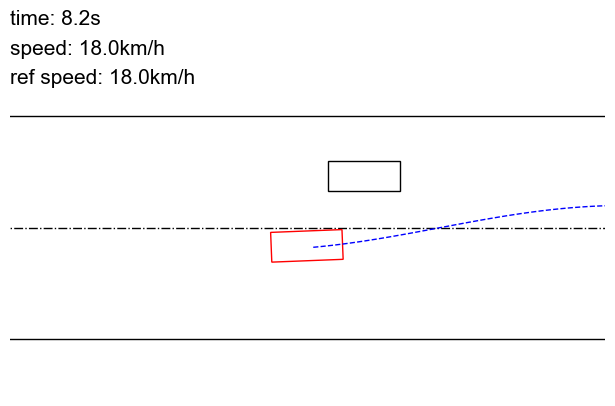

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.02983449213206768 



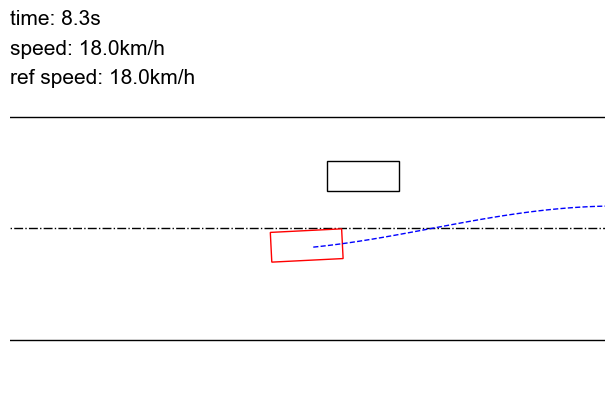

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.02724502794444561 



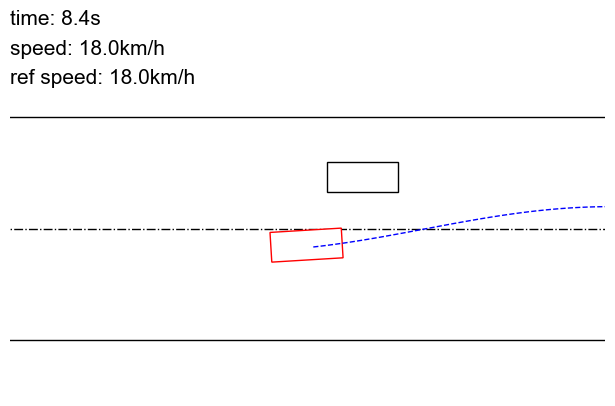

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.024679943919181824 



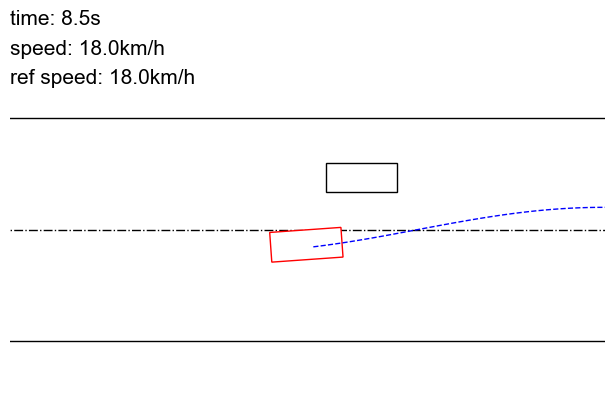

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.022128192707896233 



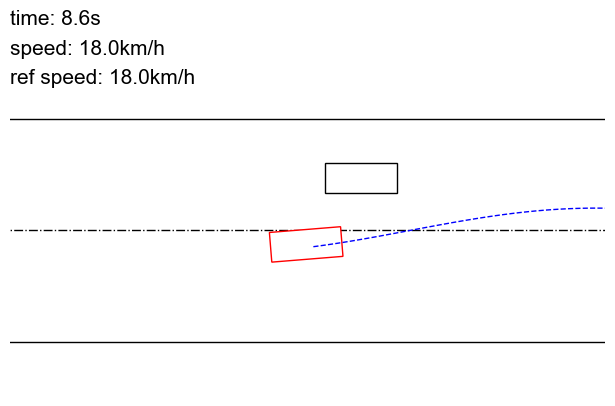

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 8
* Cost function calls: 10
* Constraint calls: 22
* System simulations: 32
* Final cost: 0.019707167521119118 



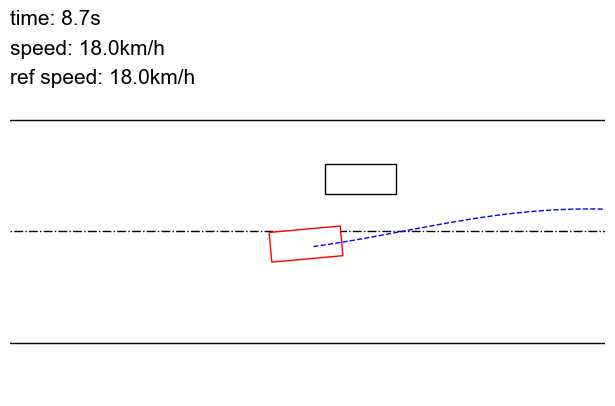

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.018645955249667168 



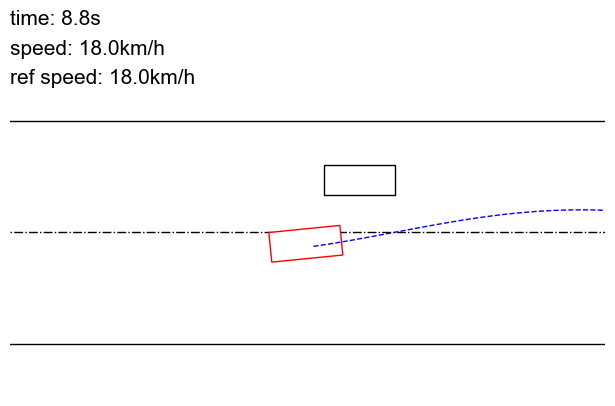

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.020090222358703613 



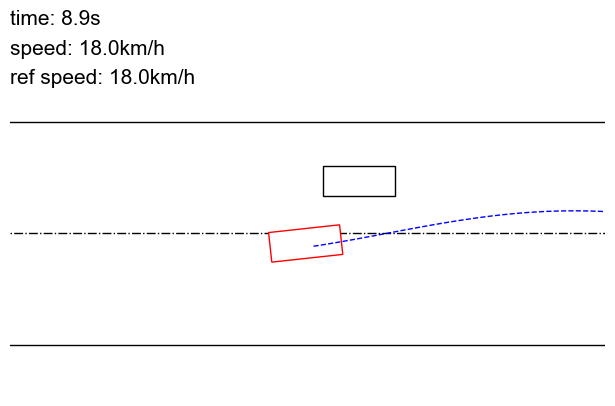

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.023726047948002815 



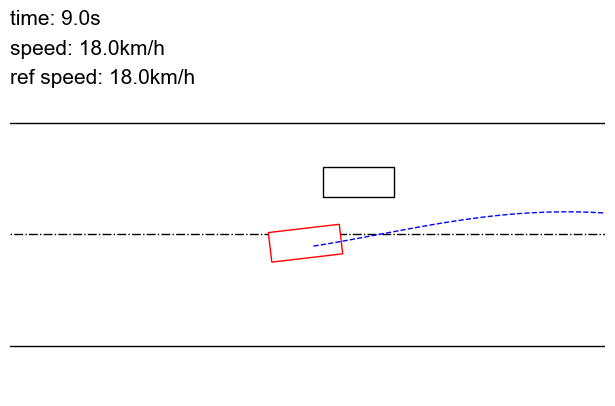

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.02924196794629097 



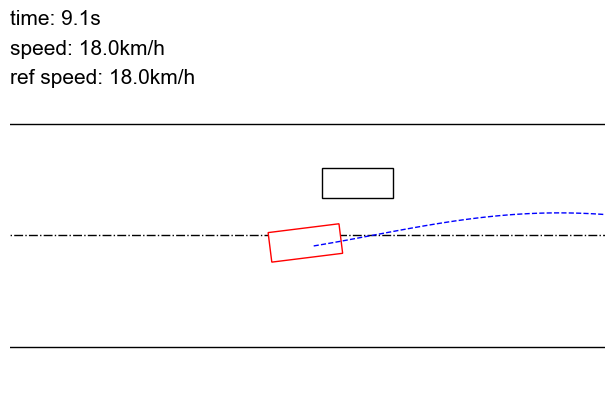

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.03630717098712921 



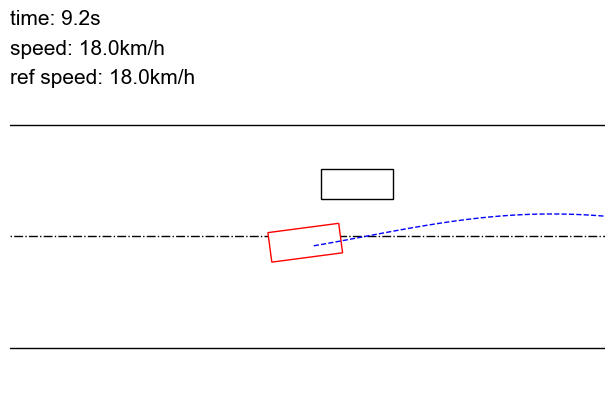

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.04457660764455795 



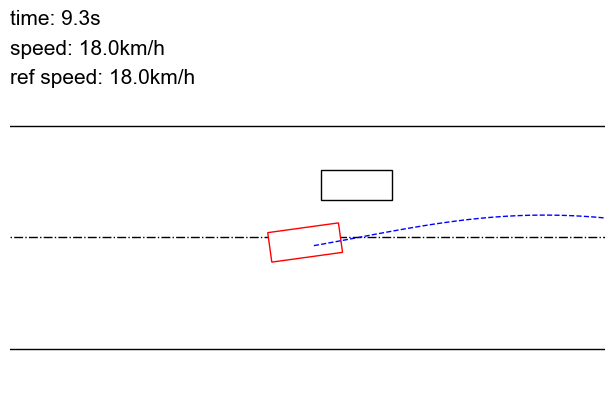

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.05370717495679855 



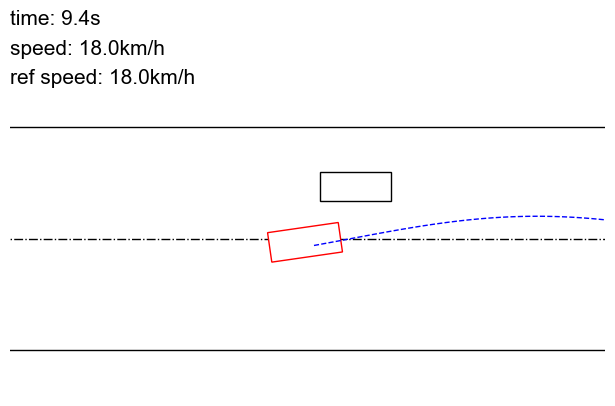

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.06335198879241943 



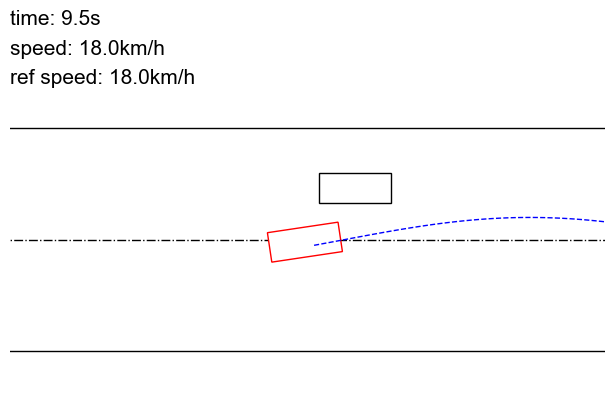

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.07342776656150818 



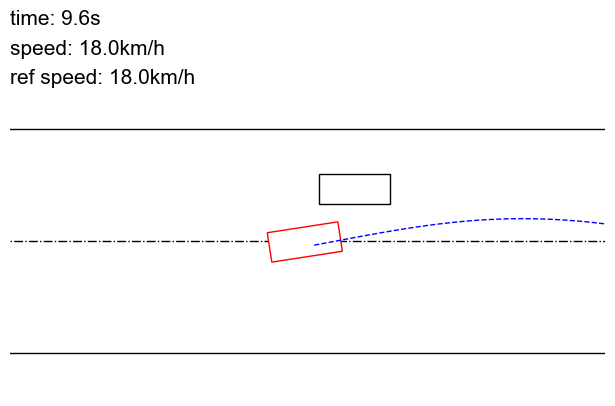

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.08459540456533432 



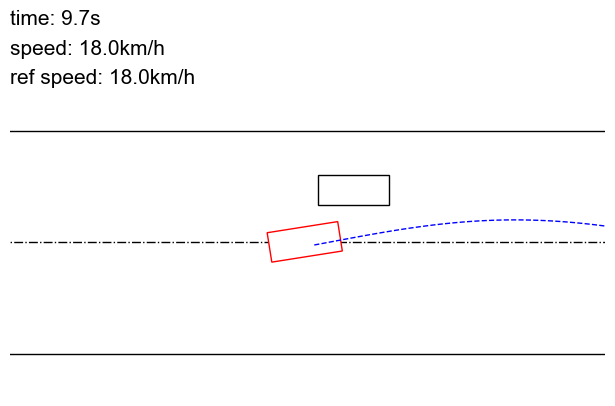

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.09704262018203735 



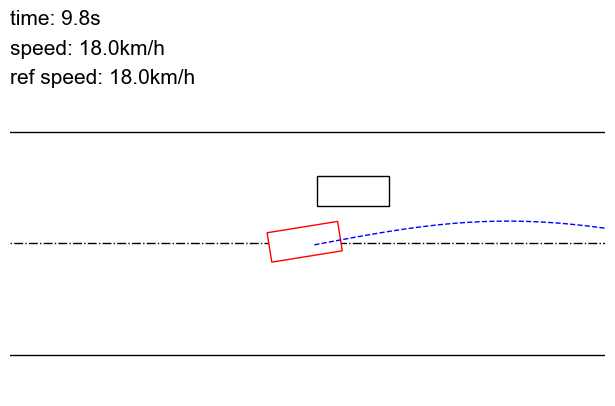

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.11073201894760132 



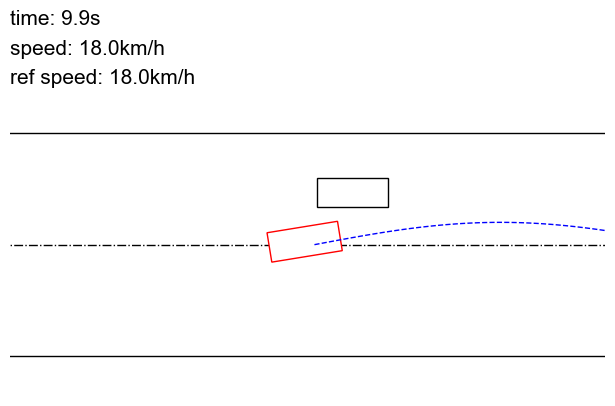

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.12549586594104767 



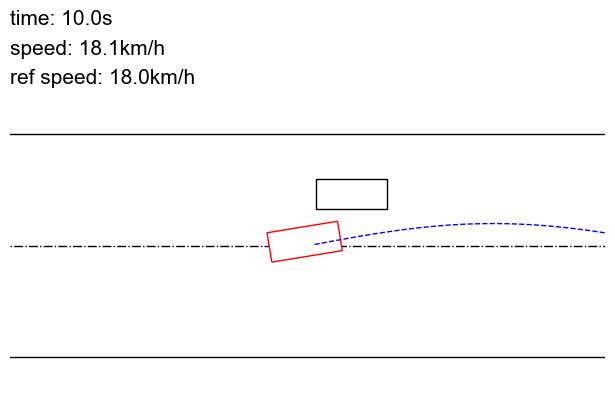

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.14110369980335236 



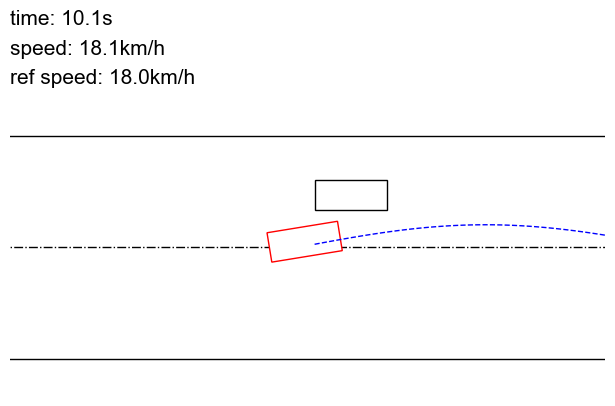

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.1572367399930954 



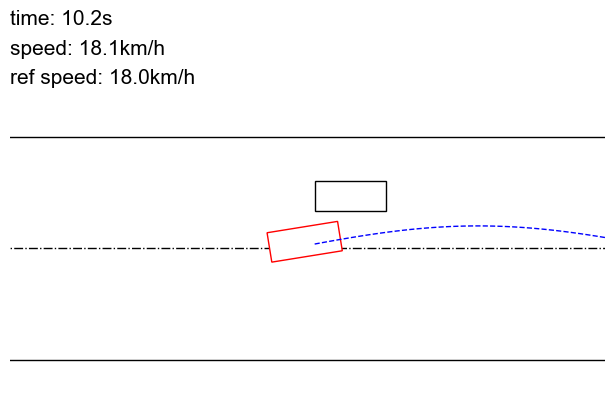

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.1735060214996338 



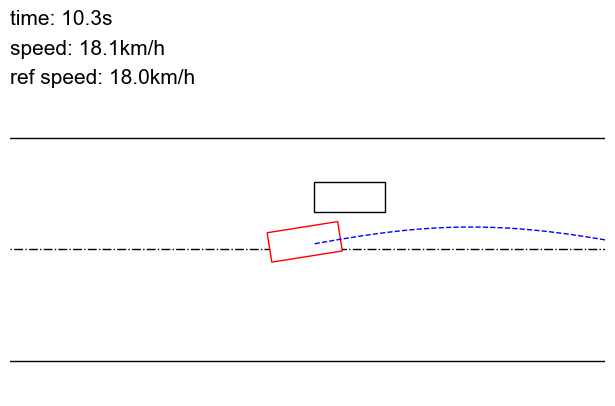

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.18956534564495087 



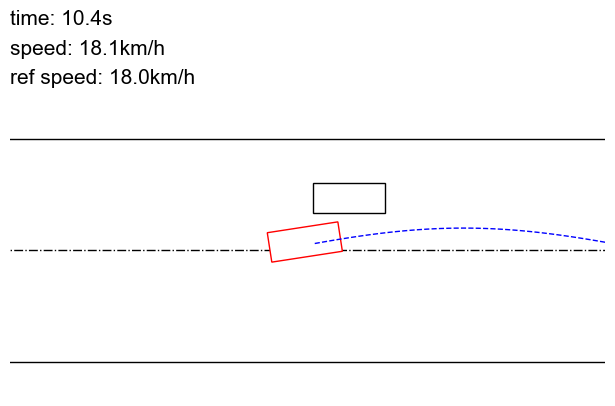

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.20496691763401031 



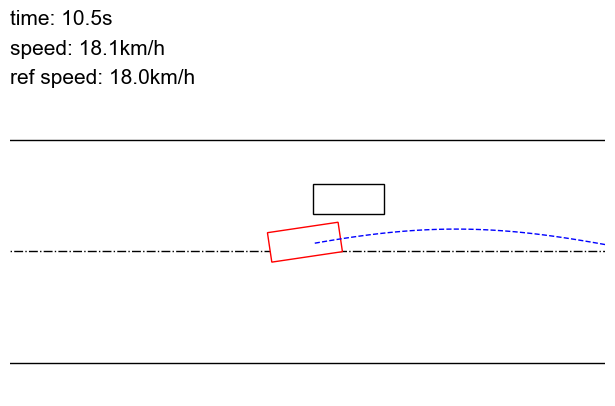

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.21929612755775452 



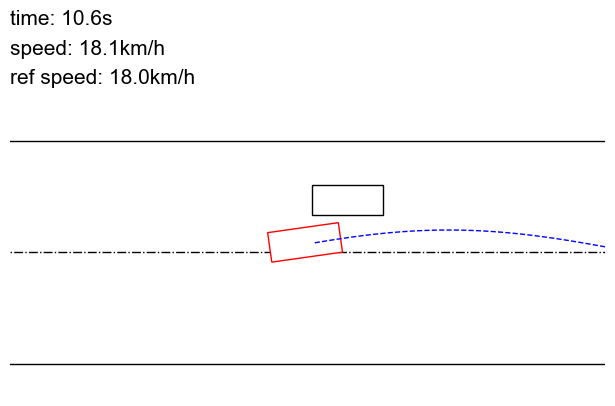

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.23213417828083038 



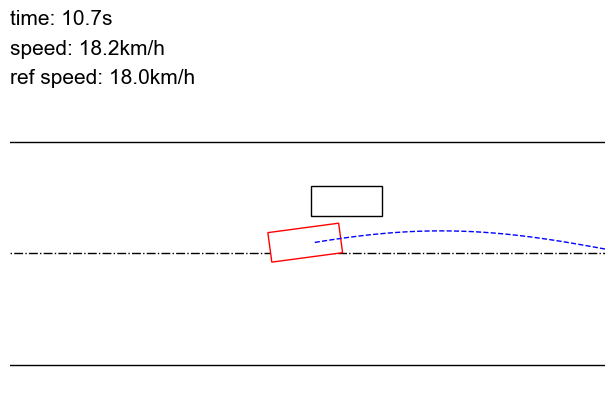

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.24307848513126373 



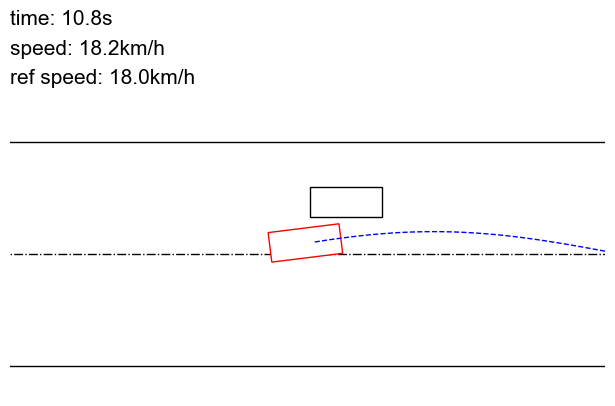

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.25177958607673645 



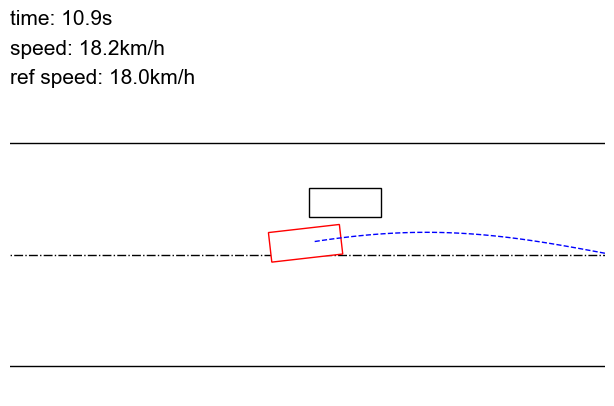

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.25794053077697754 



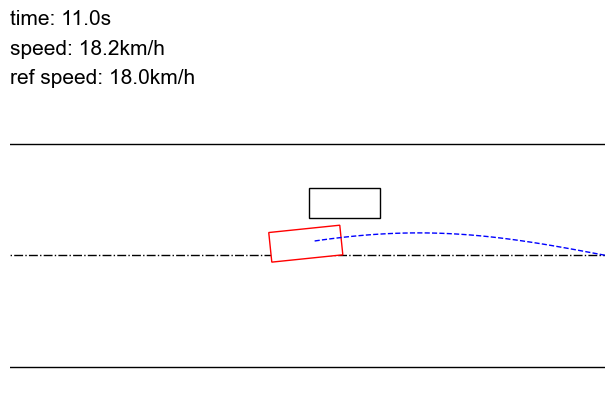

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.261734277009964 



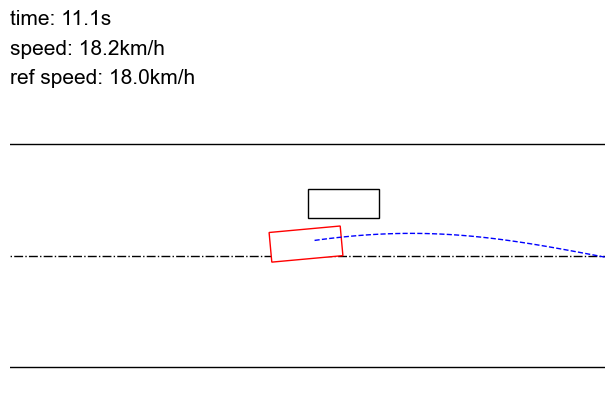

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 12
* Cost function calls: 13
* Constraint calls: 29
* System simulations: 42
* Final cost: 0.26517078280448914 



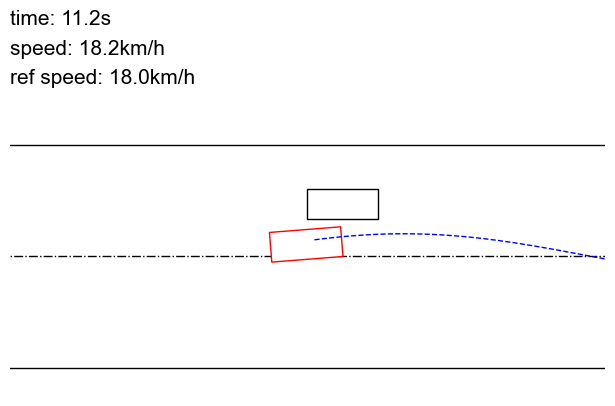

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 15
* Cost function calls: 16
* Constraint calls: 35
* System simulations: 51
* Final cost: 0.2683553695678711 



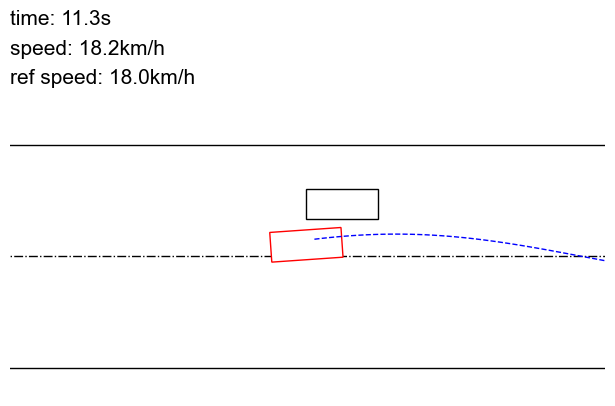

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.27006733417510986 



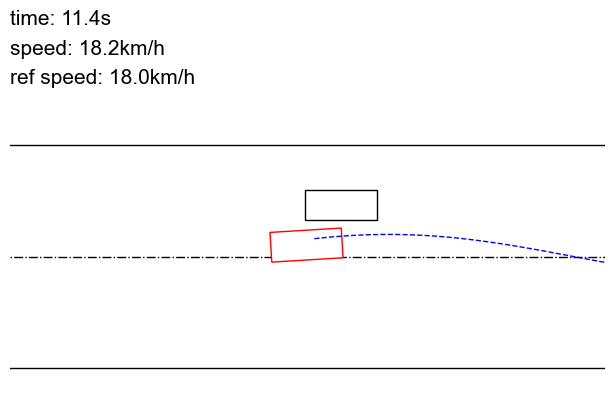

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.26939743757247925 



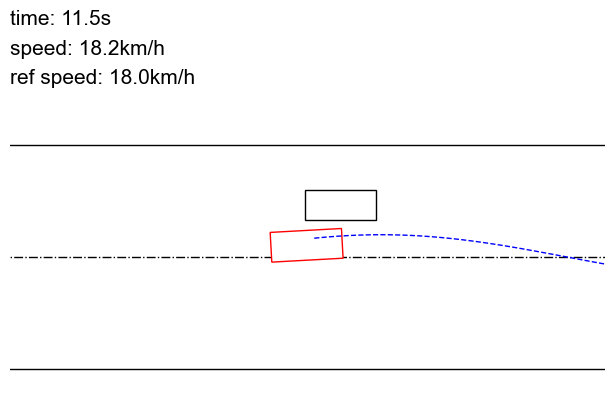

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 10
* Cost function calls: 11
* Constraint calls: 25
* System simulations: 36
* Final cost: 0.26644206047058105 



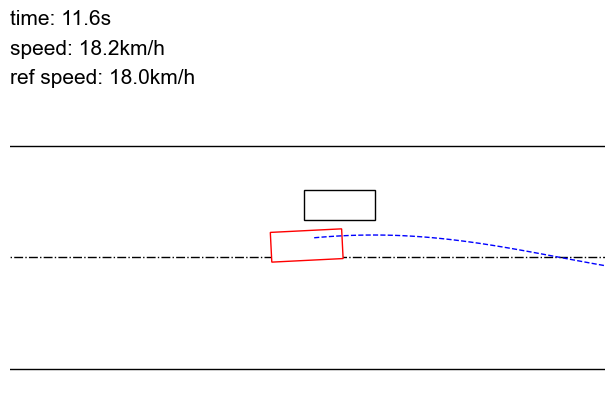

b'Maximum number of iterations exceeded (can be specified by an option).'
Summary statistics:
* Number of iterations: 200
* Cost function calls: 323
* Constraint calls: 527
* System simulations: 850
* Final cost: 0.2613688111305237 



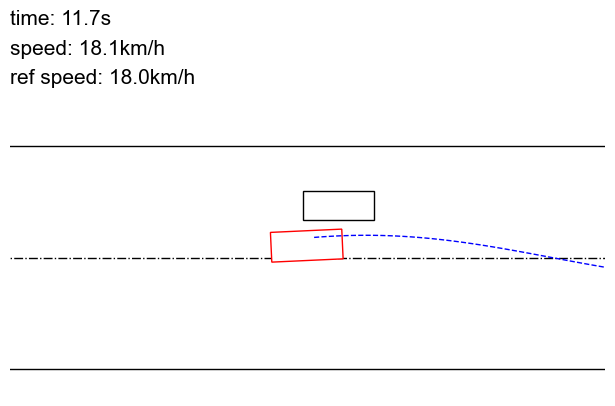

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 18
* Cost function calls: 20
* Constraint calls: 42
* System simulations: 62
* Final cost: 0.25535640120506287 



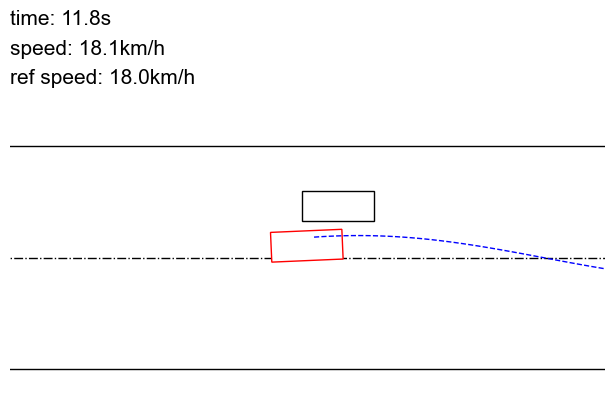

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 9
* Cost function calls: 10
* Constraint calls: 23
* System simulations: 33
* Final cost: 0.24644650518894196 



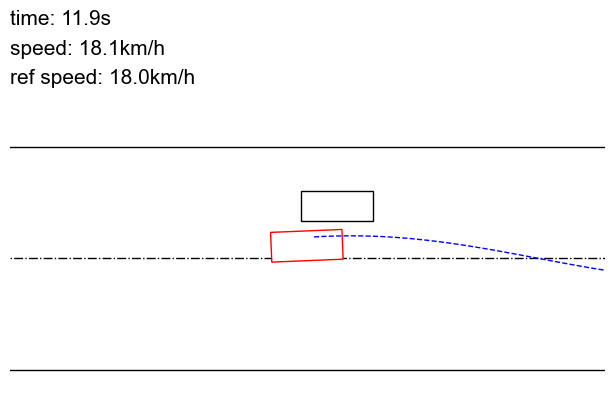

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 11
* Cost function calls: 12
* Constraint calls: 27
* System simulations: 39
* Final cost: 0.2346578985452652 



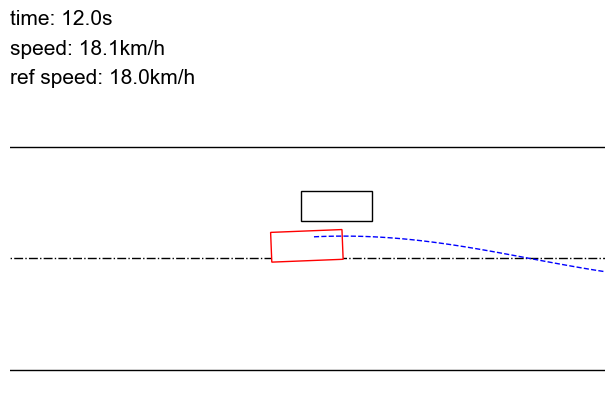

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 8
* Cost function calls: 9
* Constraint calls: 21
* System simulations: 30
* Final cost: 0.2203204333782196 



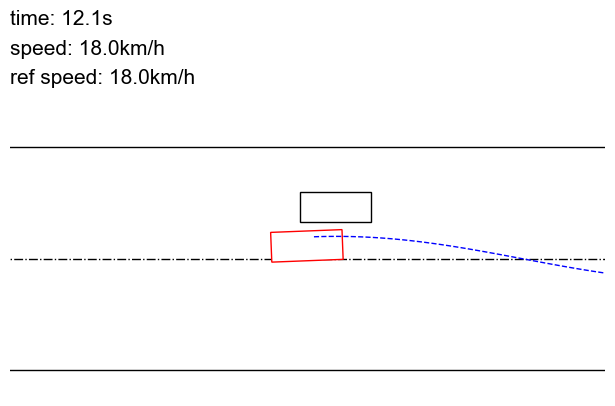

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 9
* Cost function calls: 10
* Constraint calls: 23
* System simulations: 33
* Final cost: 0.20402787625789642 



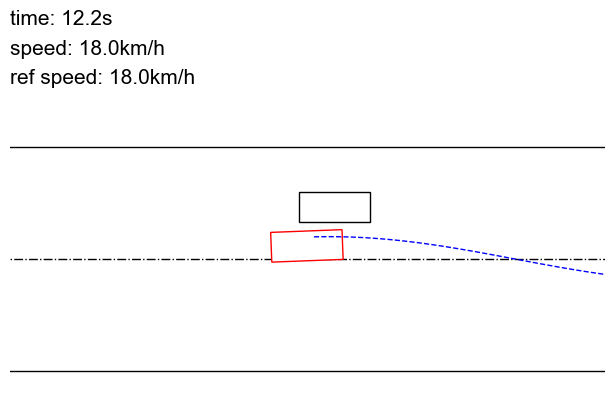

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 8
* Cost function calls: 10
* Constraint calls: 22
* System simulations: 32
* Final cost: 0.18695463240146637 



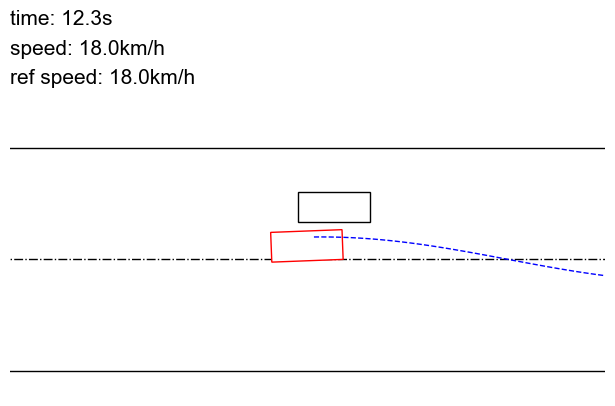

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 9
* Cost function calls: 11
* Constraint calls: 24
* System simulations: 35
* Final cost: 0.16969561576843262 



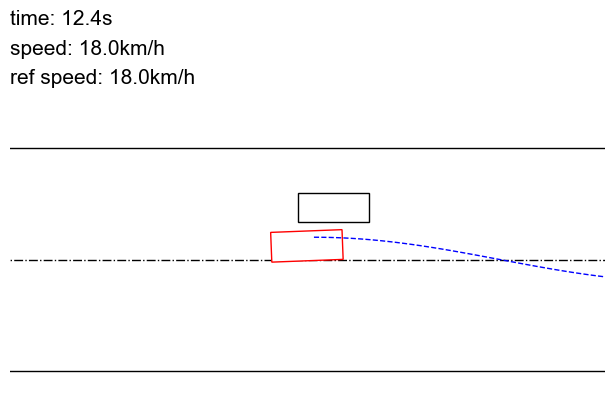

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.15291827917099 



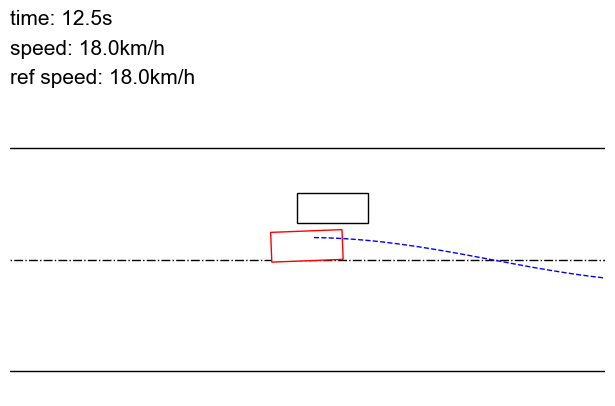

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.13714221119880676 



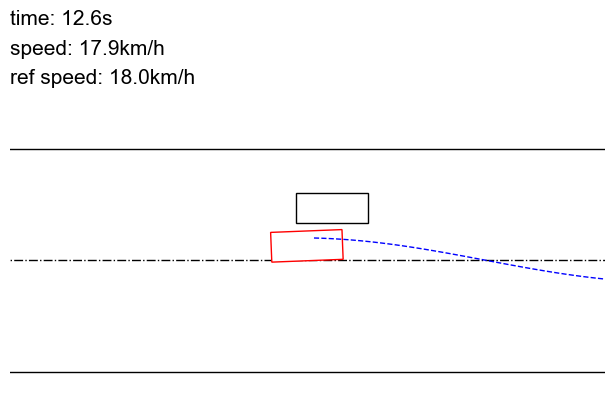

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 8
* Cost function calls: 9
* Constraint calls: 21
* System simulations: 30
* Final cost: 0.12282182276248932 



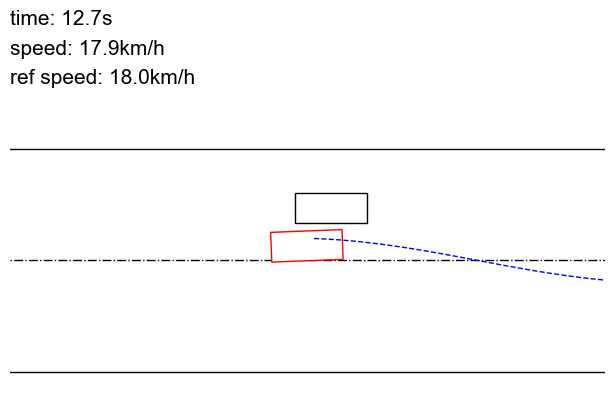

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.11030541360378265 



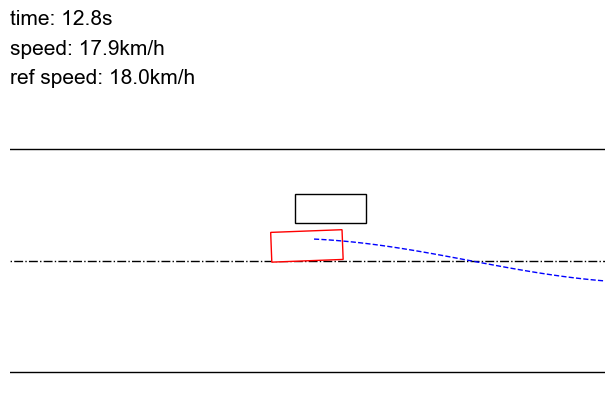

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.09930272400379181 



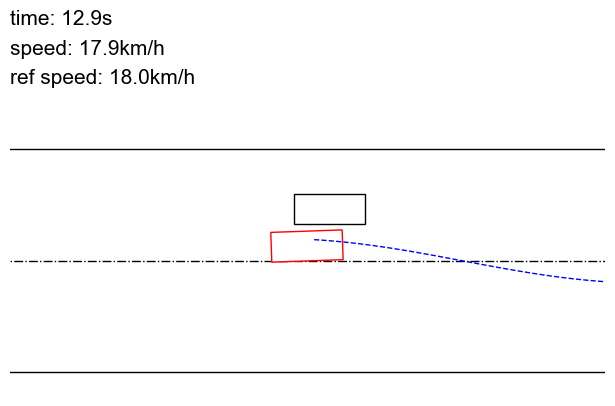

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.08966948091983795 



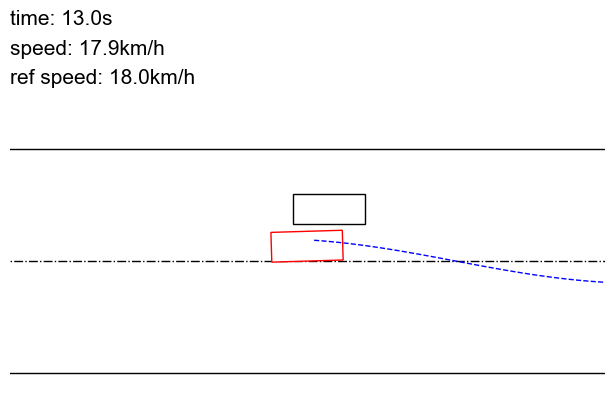

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.08128040283918381 



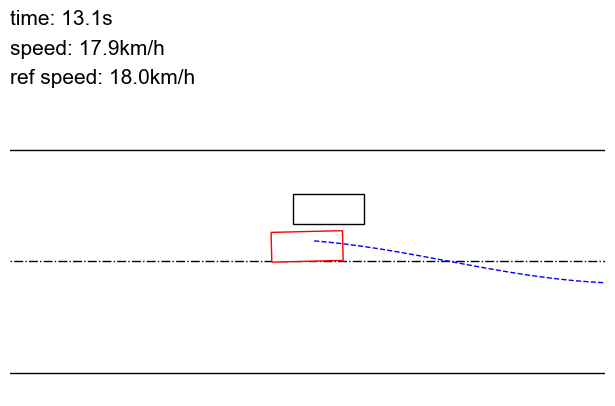

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 8
* Cost function calls: 9
* Constraint calls: 21
* System simulations: 30
* Final cost: 0.07379963248968124 



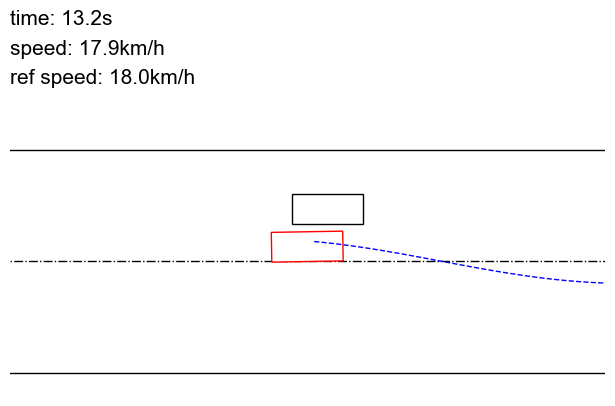

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.06716354191303253 



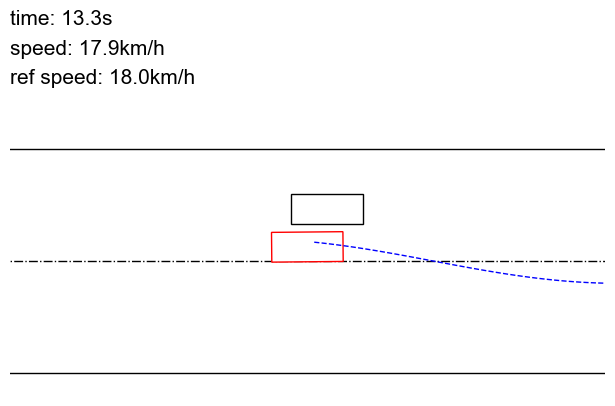

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.06123728305101395 



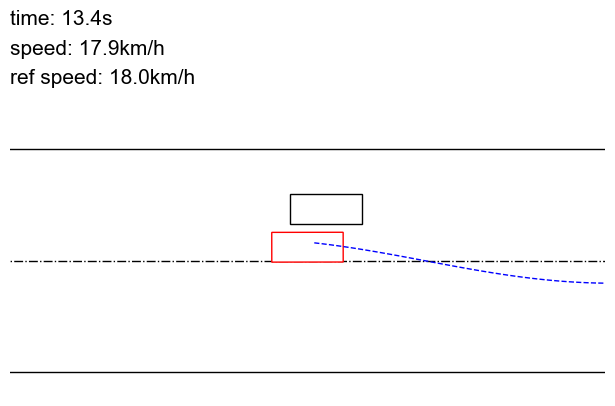

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 10
* Cost function calls: 12
* Constraint calls: 26
* System simulations: 38
* Final cost: 0.05587421730160713 



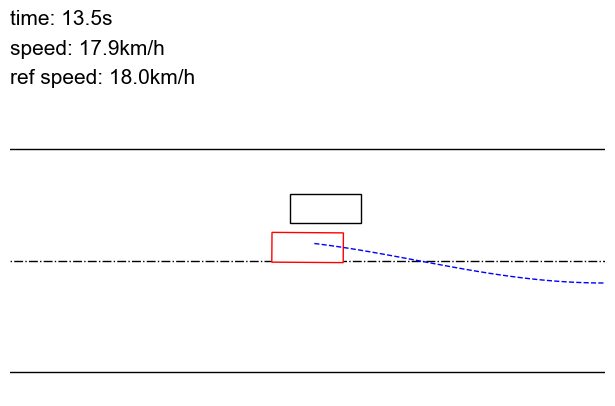

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 8
* Cost function calls: 9
* Constraint calls: 21
* System simulations: 30
* Final cost: 0.050820816308259964 



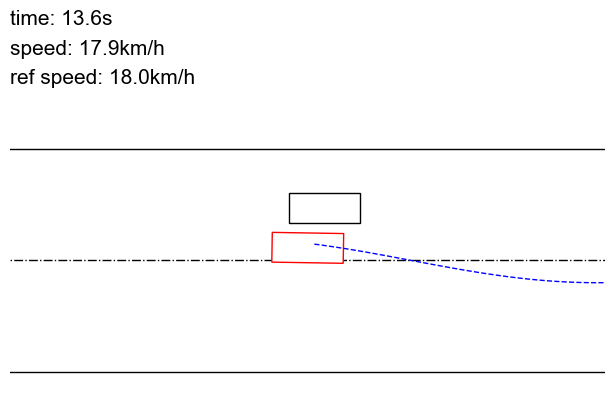

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.0460004098713398 



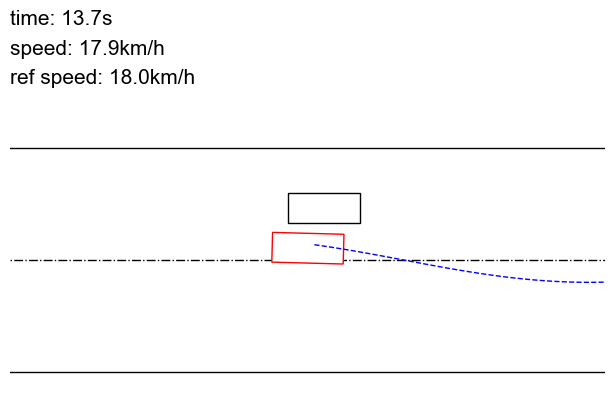

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.041384823620319366 



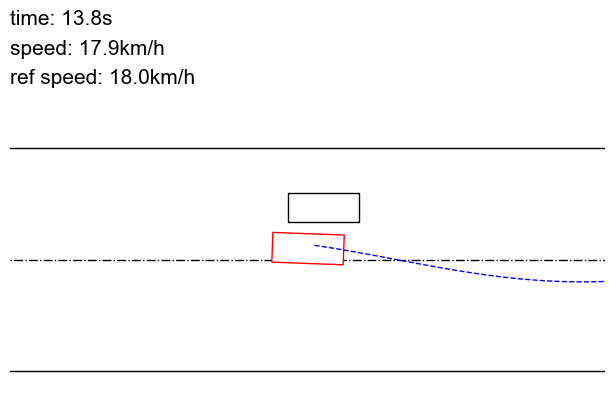

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 6
* Constraint calls: 14
* System simulations: 20
* Final cost: 0.036946188658475876 



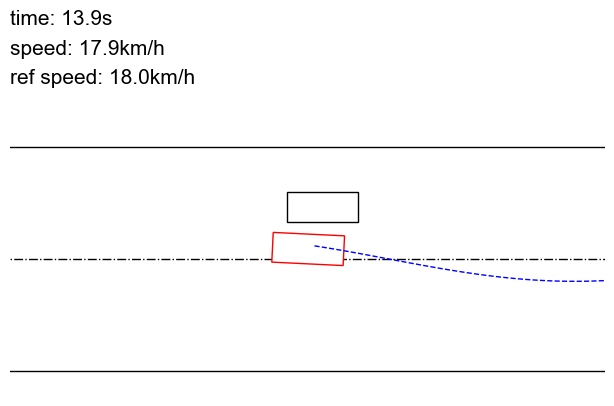

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 5
* Constraint calls: 12
* System simulations: 17
* Final cost: 0.032692890614271164 



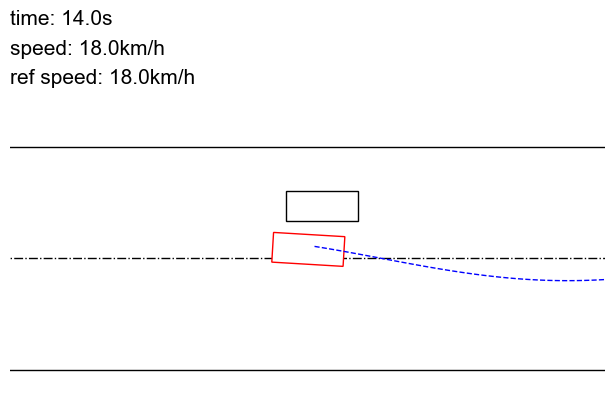

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 7
* Constraint calls: 15
* System simulations: 22
* Final cost: 0.028669193387031555 



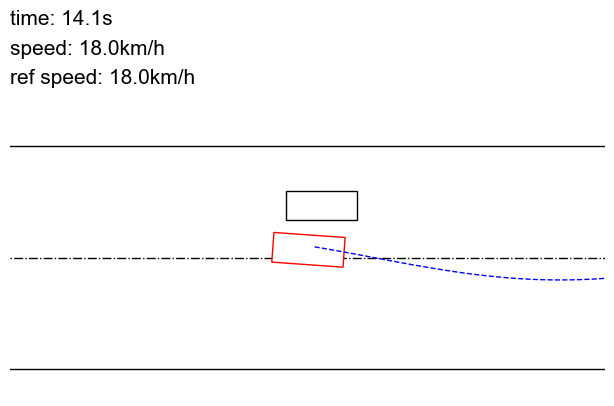

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 6
* Constraint calls: 14
* System simulations: 20
* Final cost: 0.025075118988752365 



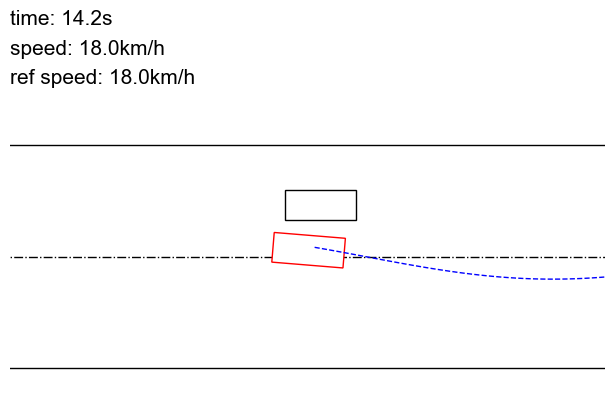

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 6
* Constraint calls: 14
* System simulations: 20
* Final cost: 0.021845195442438126 



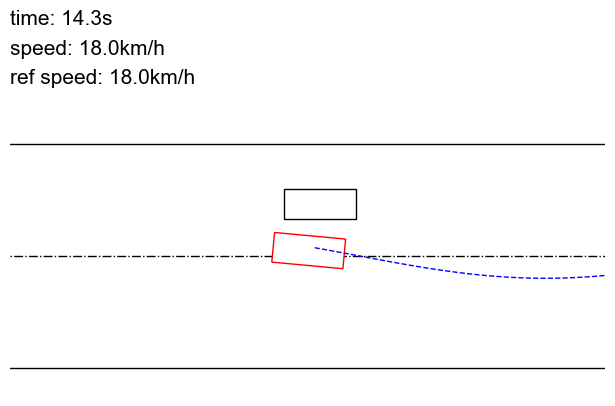

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 7
* Constraint calls: 16
* System simulations: 23
* Final cost: 0.019006764516234398 



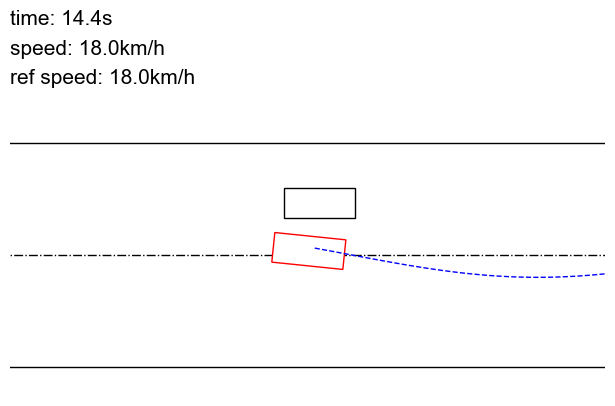

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 7
* Constraint calls: 16
* System simulations: 23
* Final cost: 0.016562724485993385 



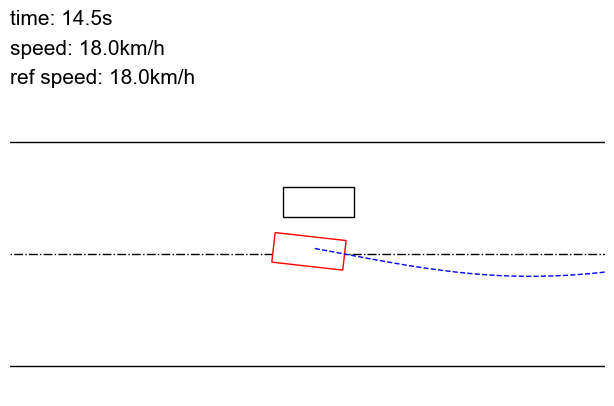

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 6
* Constraint calls: 14
* System simulations: 20
* Final cost: 0.014550109393894672 



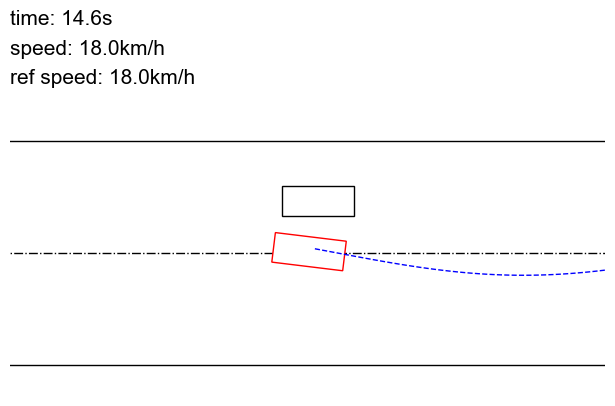

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.012955695390701294 



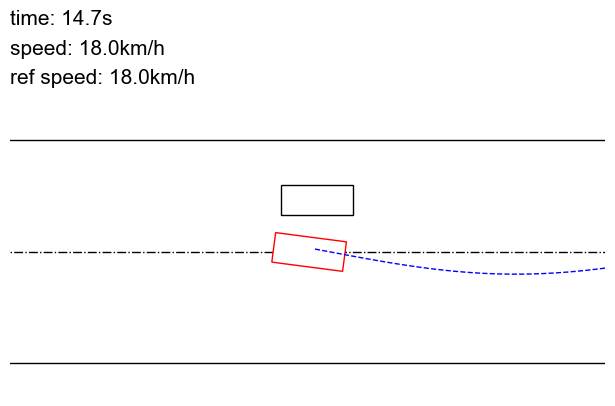

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.011760967783629894 



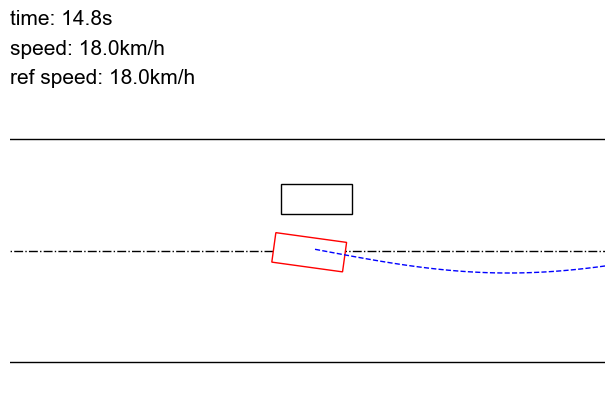

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.011000873520970345 



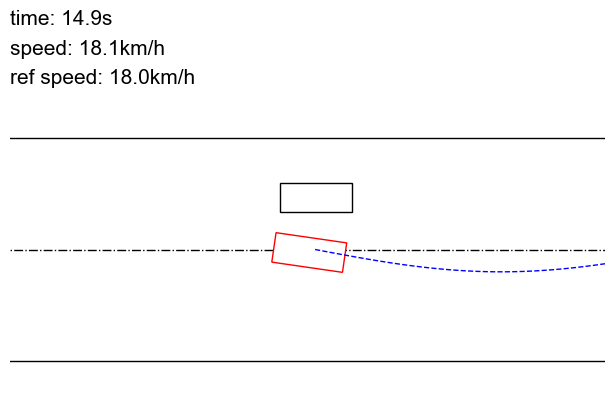

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.010611308738589287 



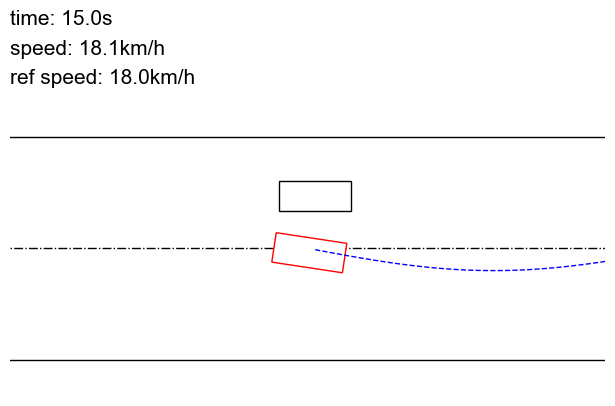

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.010604413226246834 



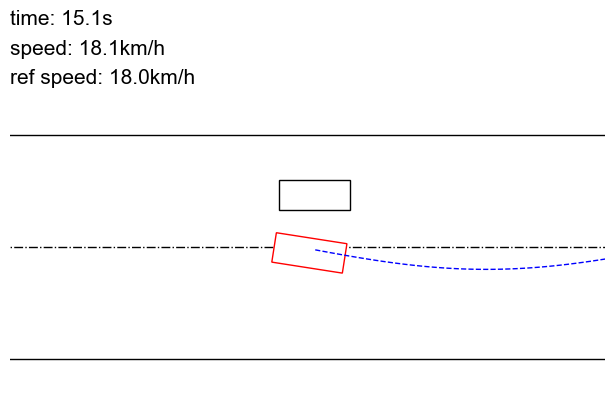

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.01094636507332325 



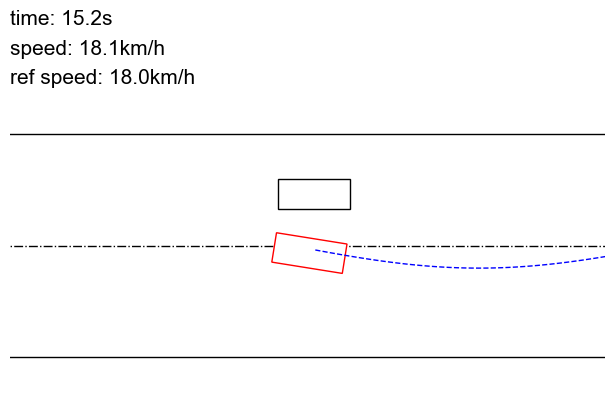

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.011603978462517262 



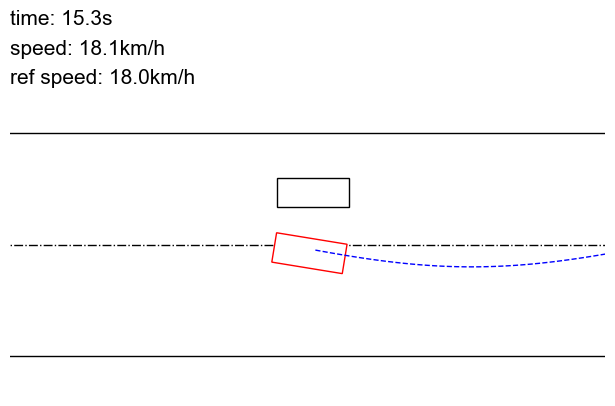

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.012544916942715645 



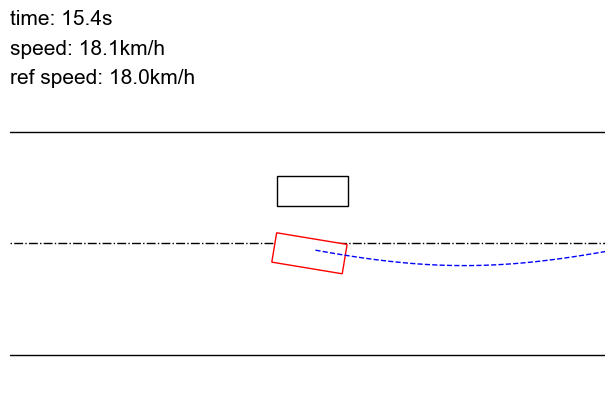

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.013734191656112671 



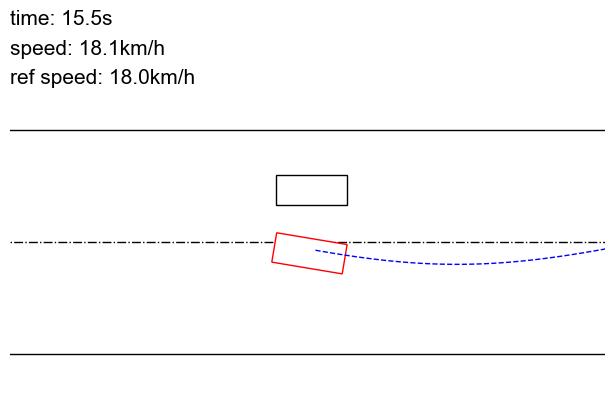

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.015133659355342388 



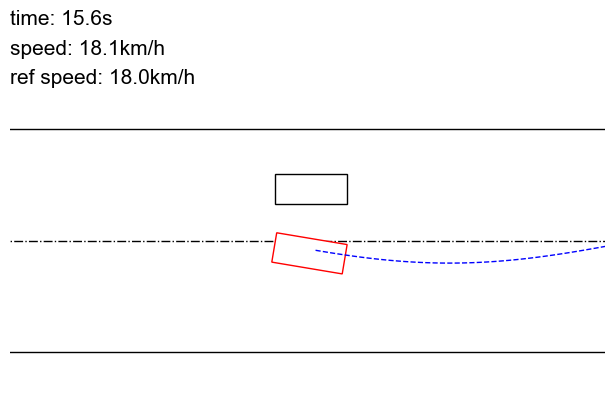

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.01670965924859047 



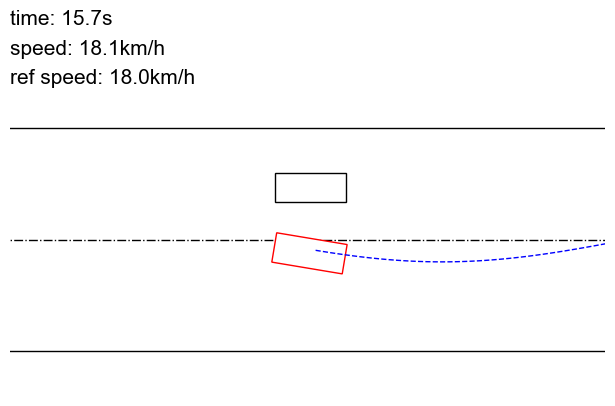

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.018422769382596016 



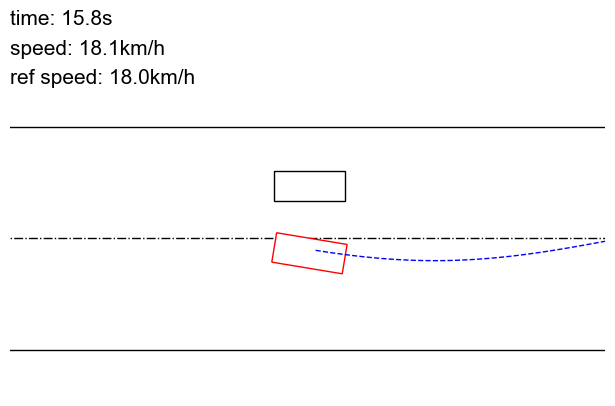

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.02023610658943653 



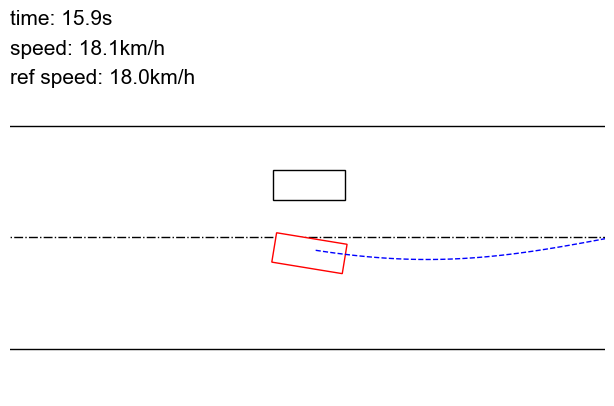

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.022118978202342987 



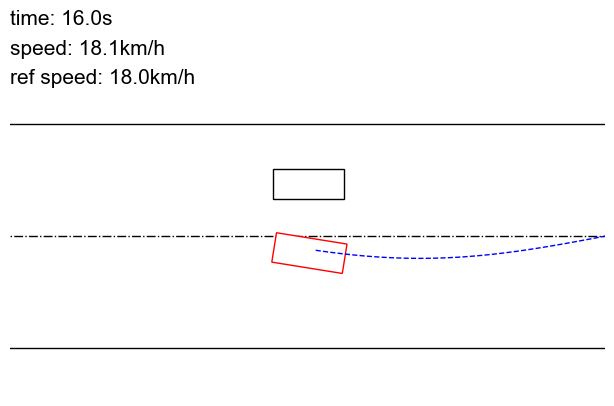

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.024028640240430832 



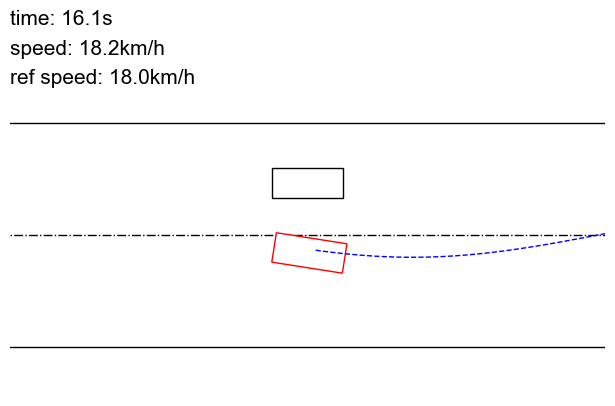

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.02592894434928894 



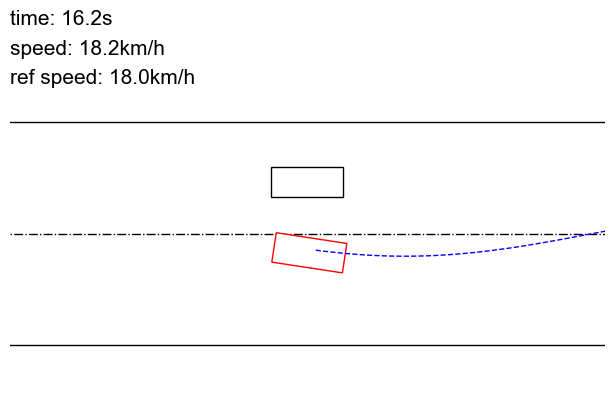

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.0277911014854908 



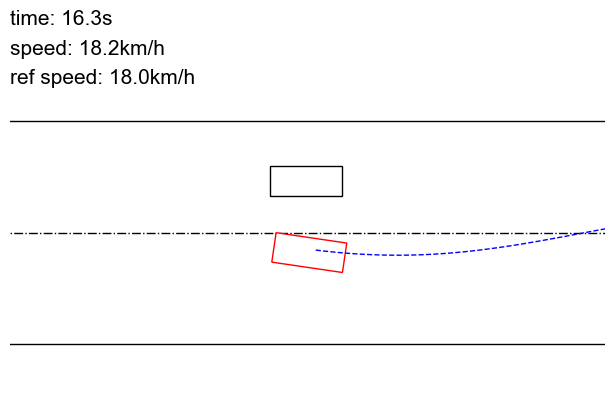

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.02958005666732788 



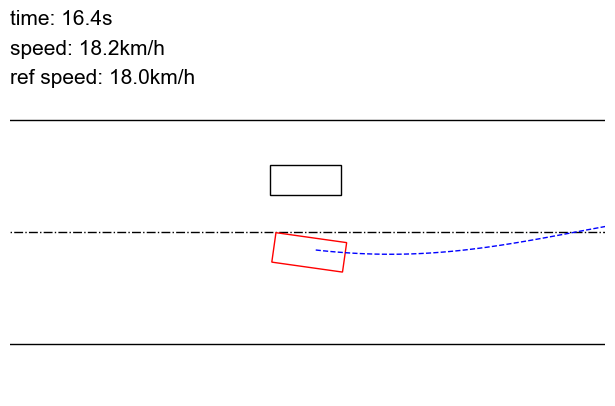

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.03126295283436775 



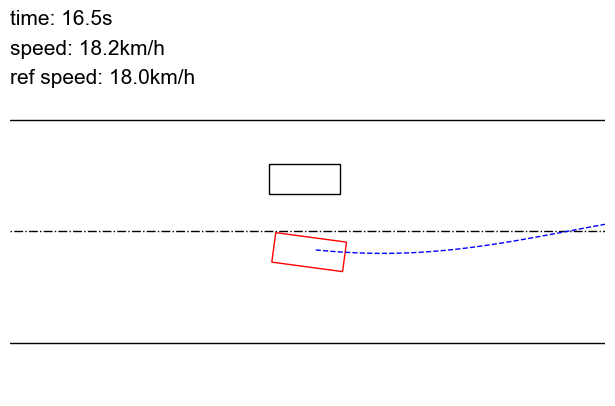

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.03281058743596077 



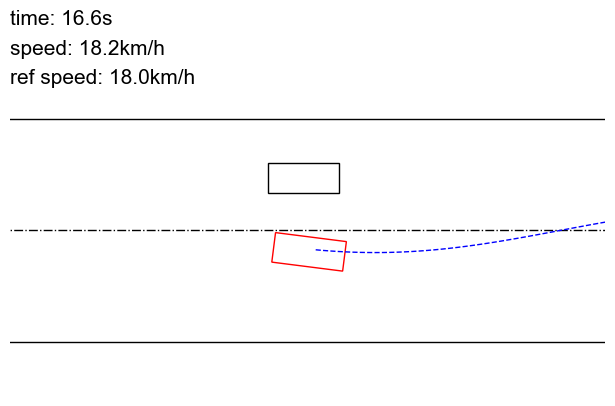

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.03419465571641922 



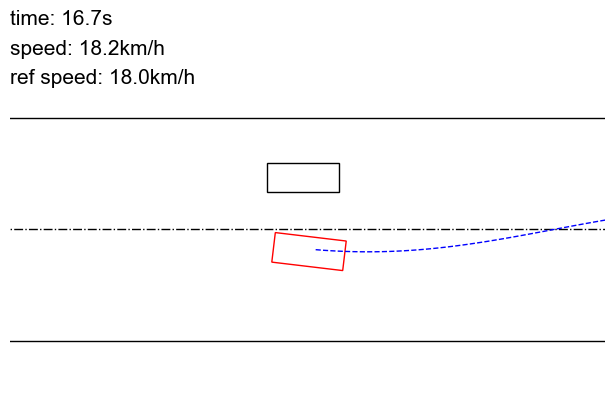

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.03539366275072098 



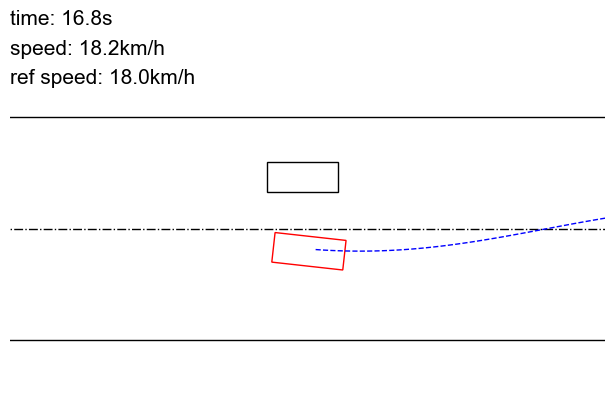

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.03638452664017677 



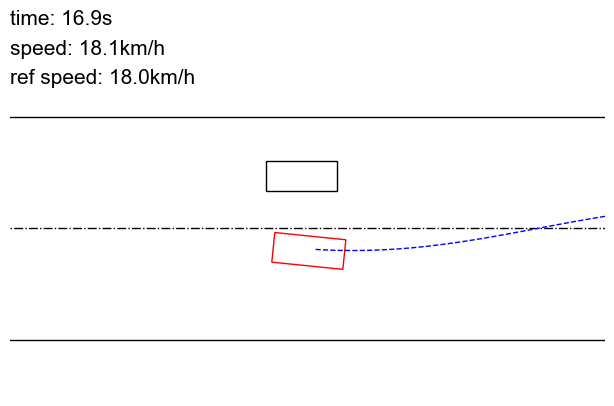

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.03715052455663681 



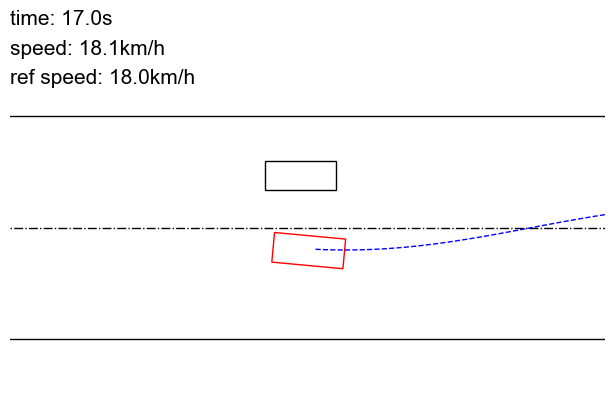

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.03768111392855644 



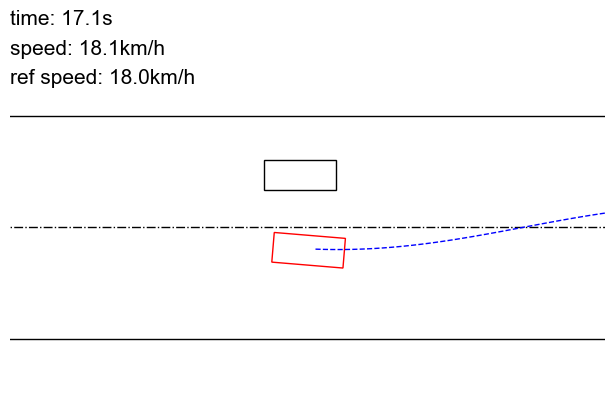

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.03796178475022316 



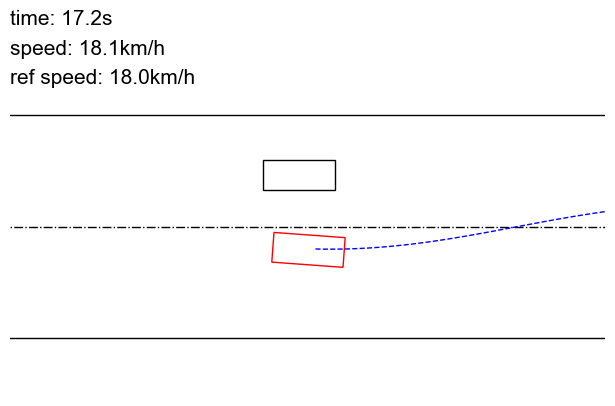

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.03798584267497063 



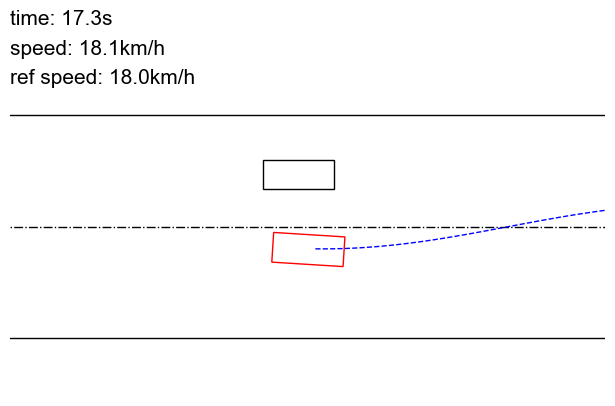

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.03775111213326454 



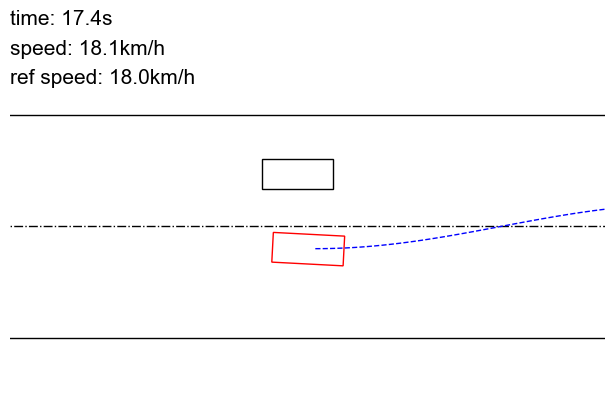

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.037260446697473526 



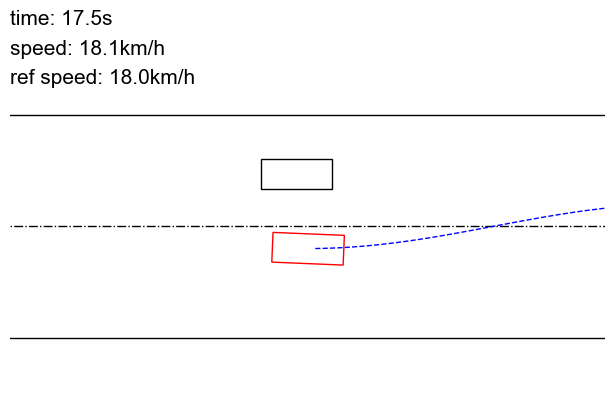

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.03651060163974762 



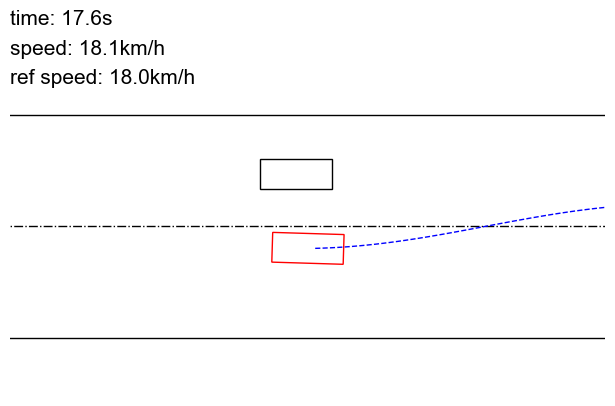

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.03552227467298508 



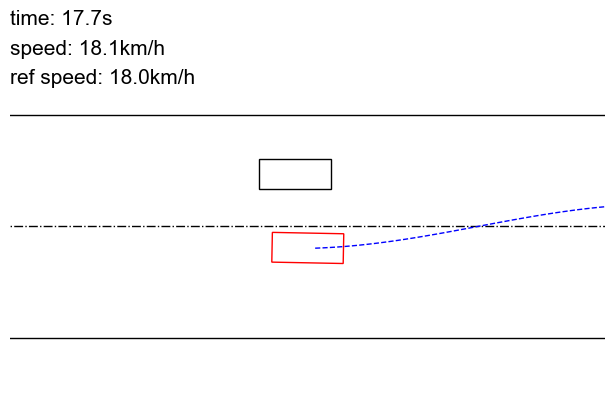

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.03432153910398483 



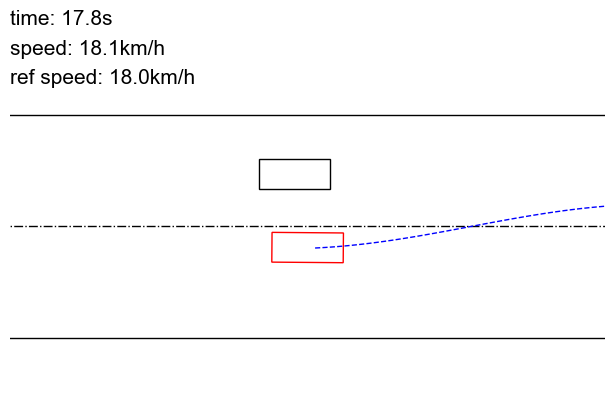

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.03292315825819969 



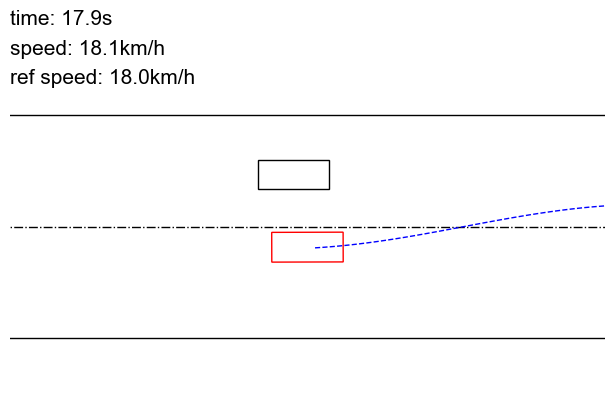

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.03135055676102638 



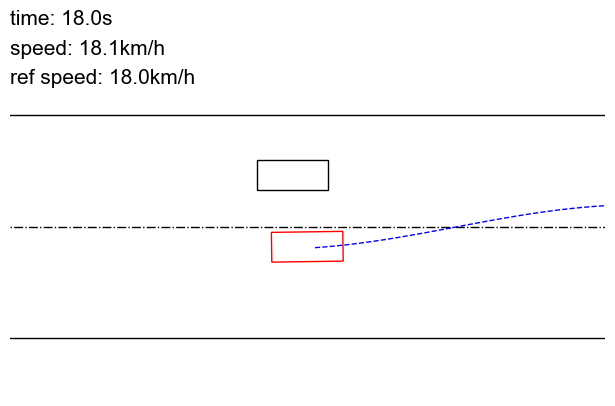

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.02962948940694332 



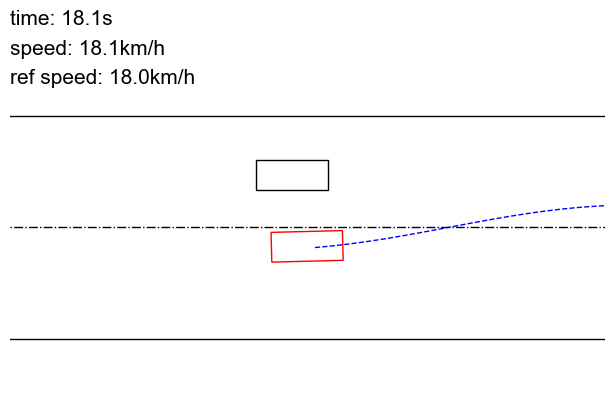

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.0277382954955101 



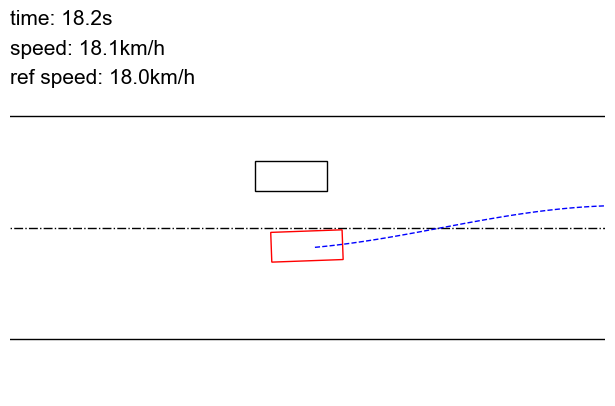

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.02577410638332367 



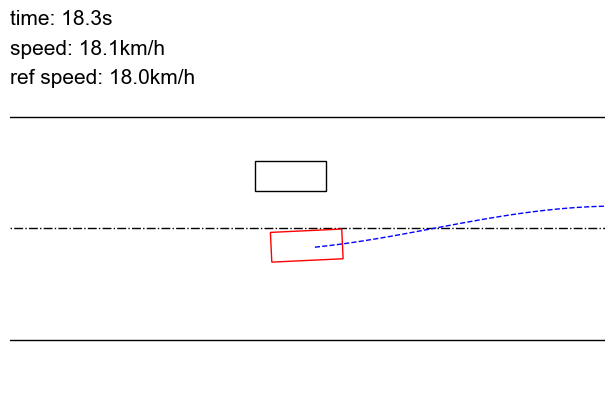

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.02380264922976494 



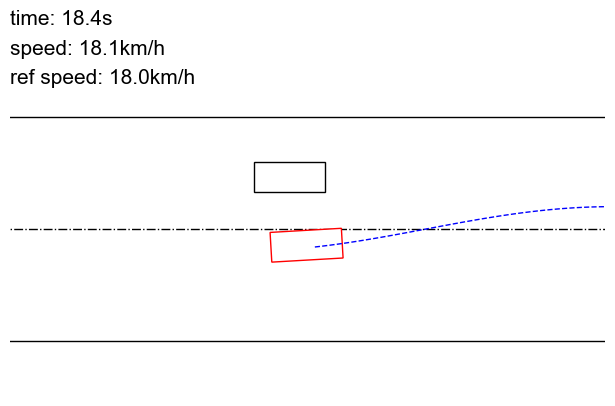

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.02178223617374897 



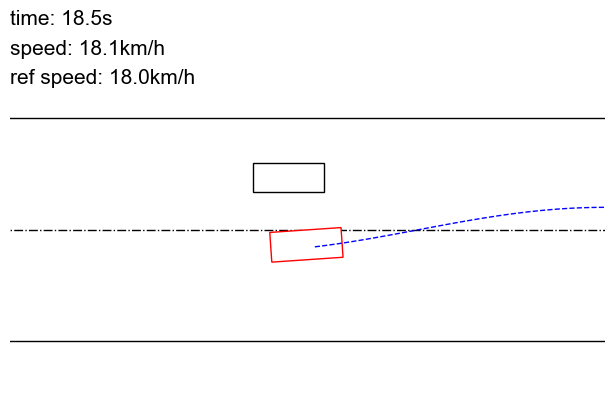

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.019780276343226433 



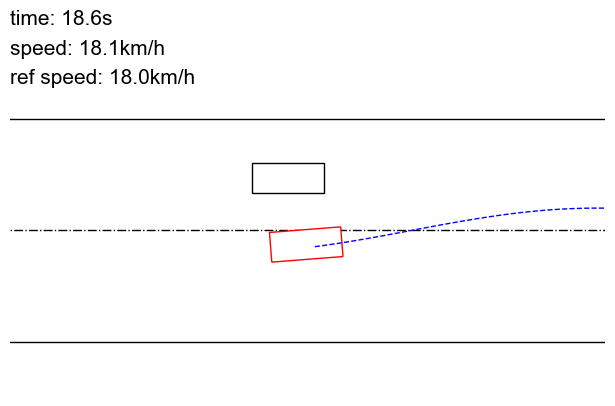

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.017819512635469437 



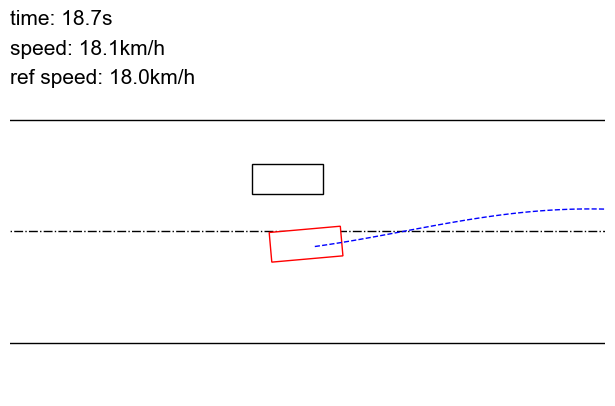

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.015950025990605354 



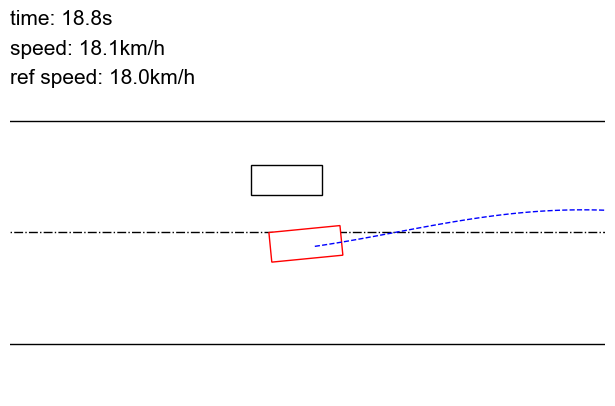

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 5
* Constraint calls: 12
* System simulations: 17
* Final cost: 0.01418348029255867 



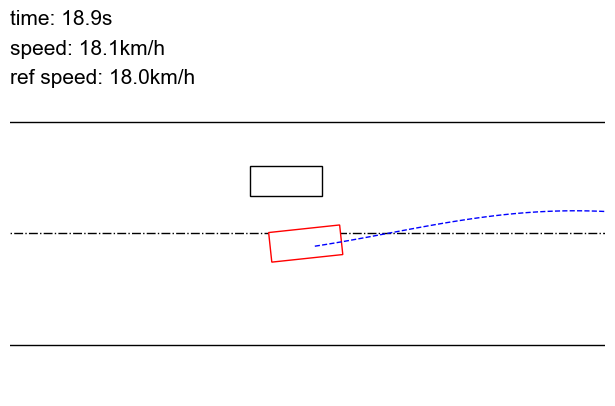

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.012549028731882572 



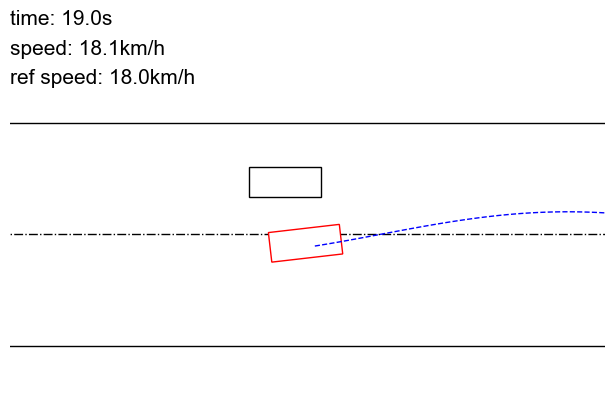

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 7
* Constraint calls: 15
* System simulations: 22
* Final cost: 0.011074189096689224 



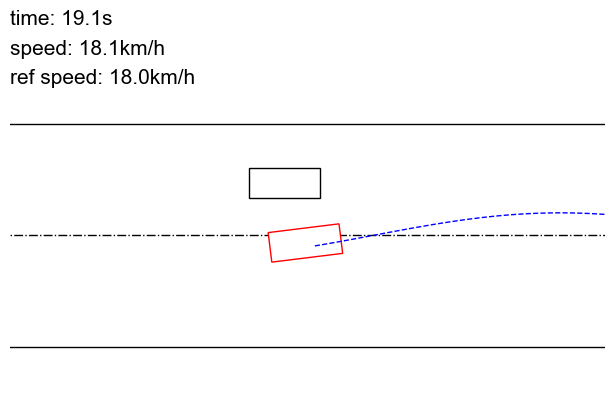

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.009747335687279701 



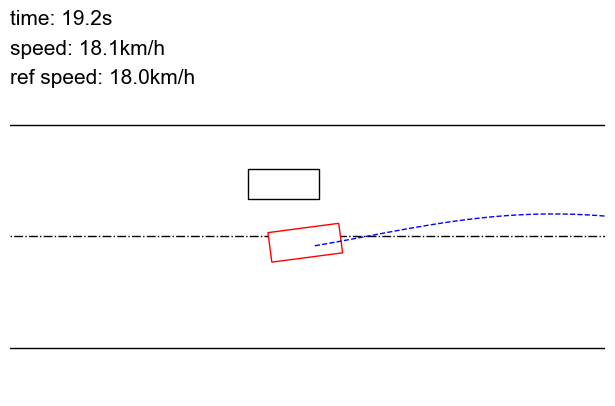

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 9
* Cost function calls: 10
* Constraint calls: 23
* System simulations: 33
* Final cost: 0.01120383944362402 



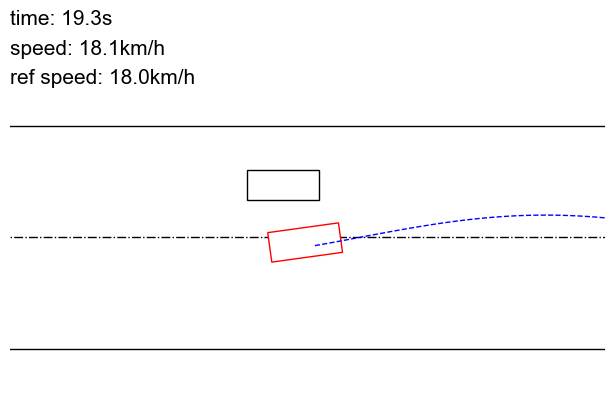

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.01797080785036087 



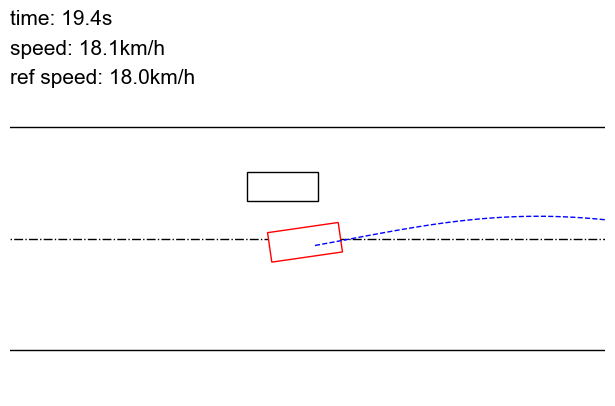

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.02913162112236023 



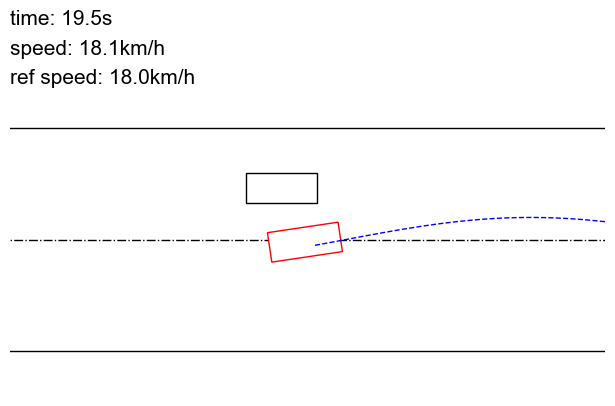

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.04384562373161316 



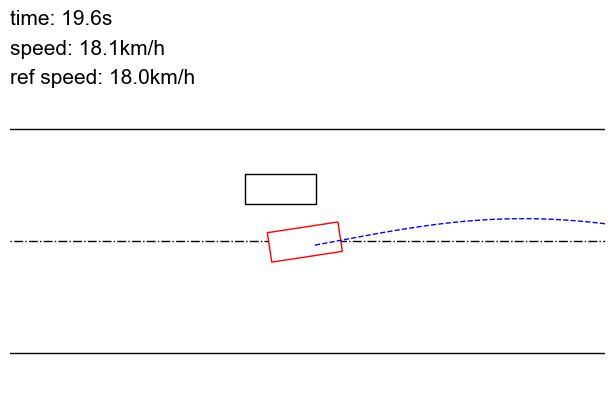

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.06129566580057144 



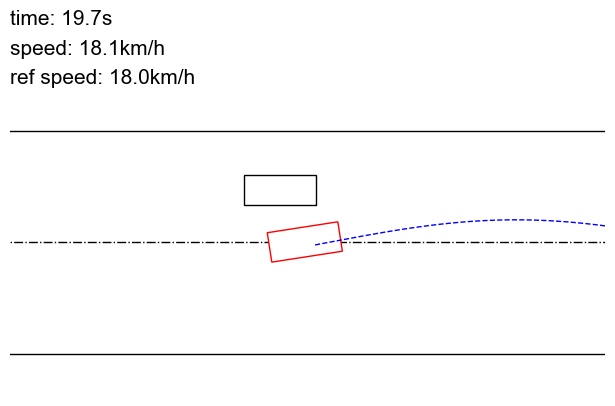

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.08071131259202957 



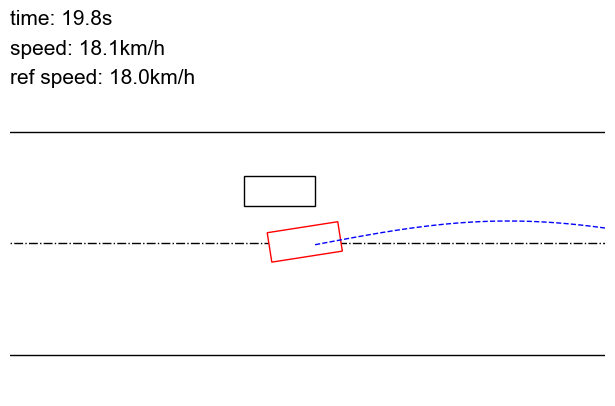

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.10134793817996979 



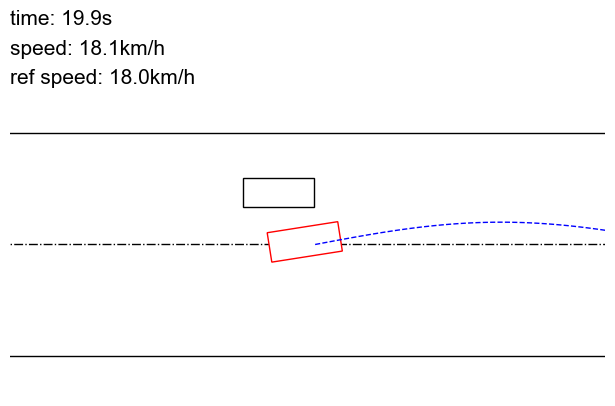

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.12247685343027115 



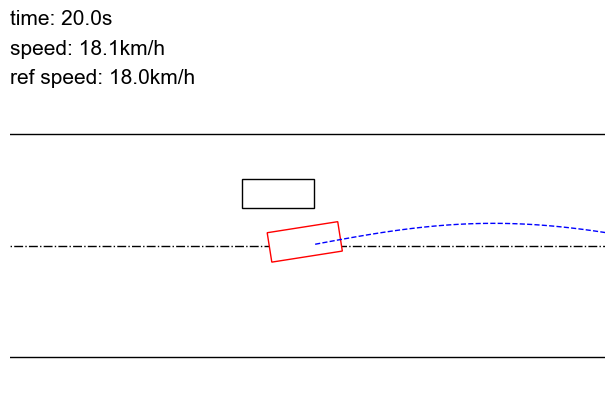

In [2]:
from src.shared import get_env
from src.tester import mpc_sample_episodes_batched_with_infos
from src.env.tracking.pyth_veh3dofconti_surrcstr_model import Veh3dofcontiSurrCstrModel
env_name = "tracking_model"

nn_dir = "02-25-23_13.47.32_DRPO_22" # fill in this
log_dir = "MPC"

# load cfg from the trained model
cfg = Config()
model = Veh3dofcontiSurrCstrModel(**cfg.env_cfg)

assert log_dir is not None, 'Must specify --run-dir'
run_dir = LOGS_DIR / nn_dir
assert run_dir.is_dir(), f'Run directory does not exist: {run_dir}'

with (run_dir / 'config.json').open('r') as f:
    saved_cfg = json.load(f)
    cfg.update(saved_cfg)

cfg.alg_cfg.update(dict(mode='test'))
cfg.env_cfg.update(dict(render=True))

# Ensure all required arguments have been set
for attr in ('env_name', 'seed'):
    assert hasattr(cfg, attr), f'Config must specify {attr}'

# creat MPC controller
env = get_env(env_name, wrap_torch = False, rescale_action = False, **{**cfg.env_cfg, **dict(id=0)})
opt_args = cfg.opt_args
MPC_controller = OptController(model, **opt_args,)

# load model and set env
test_log_dir = run_dir / log_dir
test_log_dir.mkdir(exist_ok=True, parents=True)

print(f'Test log directory: {test_log_dir}')

# run evaluation
print("env", env)
test_traj, info_traj = mpc_sample_episodes_batched_with_infos(env, MPC_controller, 1)

In [3]:
lengths = [len(traj) for traj in test_traj]
length_mean = float(np.mean(lengths))

returns = [traj.get('rewards').sum().item() for traj in test_traj]
return_mean = float(np.mean(returns))

print(f'test length mean: {length_mean}')
print(f'test return mean: {return_mean}')

test length mean: 200.0
test return mean: -2.3979010581970215


In [4]:
# get necessary data trajectories
traj_len = len(test_traj[0].get("actions"))
time_steps = np.arange(traj_len) * 0.1

surrs_states = np.array(info_traj[0]["surr_state"], dtype=np.float32)
states = np.array(info_traj[0]["state"], dtype=np.float32)
actions = np.array(test_traj[0].get("actions").cpu().numpy(), dtype=np.float32)
constraints = np.array(info_traj[0]["constraint_value"], dtype=np.float32)
video = np.array(info_traj[0]["img"], dtype=np.float32) / 255.0

ego_pos = states[:, :2]
ref_pos = np.array(info_traj[0]["ref_points"], dtype=np.float32)[:, 0, :2]
surrs_poses = surrs_states[:, :, :2]

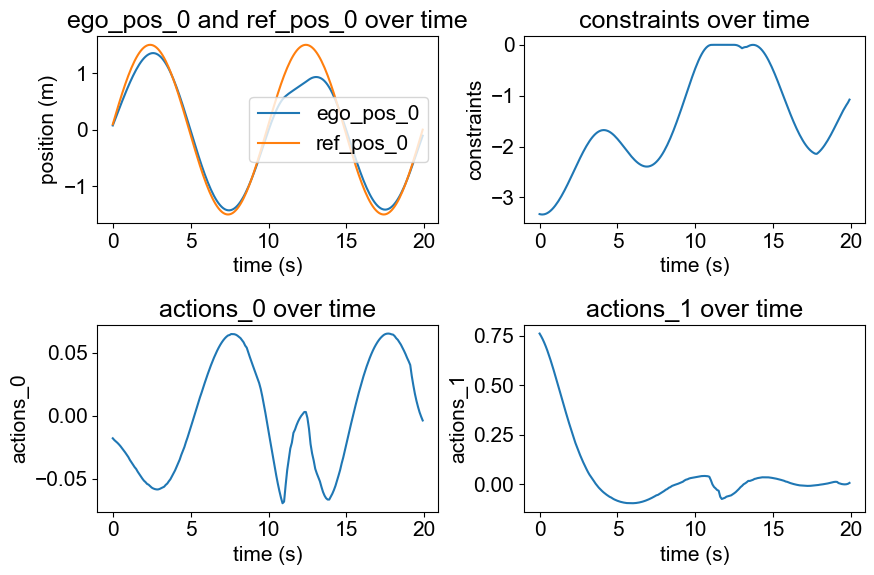

In [5]:
# plot curves
# draw a 2 * 2 figure, where the top left is the ref_pos_1 (red) and ego_pos_1 (blue) evolution
# over time; top right the constraints; bottom left the actions_0; bottom right the actions_1
fig, axs = plt.subplots(2, 2, figsize=(9, 6))
axs[0, 0].plot(time_steps, ego_pos[:, 1], label="ego_pos_0")
axs[0, 0].plot(time_steps, ref_pos[:, 1], label="ref_pos_0")
axs[0, 0].set_title("ego_pos_0 and ref_pos_0 over time")
axs[0, 0].set_xlabel("time (s)")
axs[0, 0].set_ylabel("position (m)")
axs[0, 0].legend()

axs[0, 1].plot(time_steps, constraints)
axs[0, 1].set_title("constraints over time")
axs[0, 1].set_xlabel("time (s)")
axs[0, 1].set_ylabel("constraints")

axs[1, 0].plot(time_steps, actions[:, 0])
axs[1, 0].set_title("actions_0 over time")
axs[1, 0].set_xlabel("time (s)")
axs[1, 0].set_ylabel("actions_0")

axs[1, 1].plot(time_steps, actions[:, 1])
axs[1, 1].set_title("actions_1 over time")
axs[1, 1].set_xlabel("time (s)")
axs[1, 1].set_ylabel("actions_1")

fig.tight_layout()

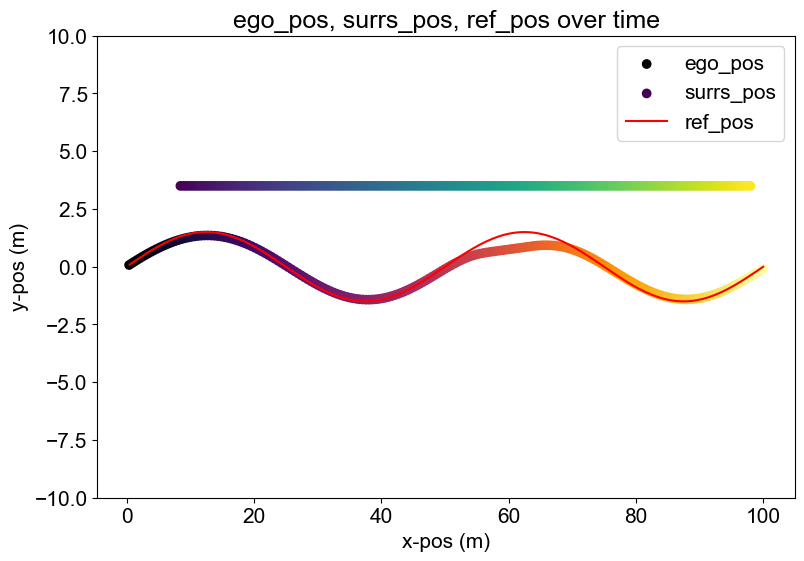

In [6]:
# draw a figure about the ego_pos, surrs_poses, ref_pos evoluation
# x-pos_0, y-pos_1 with scatter
# the color should be darker as time goes by

fig, axs = plt.subplots(1, 1, figsize=(9, 6))
axs.scatter(ego_pos[:, 0], ego_pos[:, 1], c=time_steps, label="ego_pos", cmap="inferno")
axs.scatter(surrs_poses[:, :, 0], surrs_poses[:, :, 1], c=time_steps, label="surrs_pos", cmap="viridis")
axs.plot(ref_pos[:, 0], ref_pos[:, 1], label="ref_pos", c="red")
axs.set_title("ego_pos, surrs_pos, ref_pos over time")
axs.set_xlabel("x-pos (m)")
axs.set_ylabel("y-pos (m)")
axs.set_ylim(-10, 10)
axs.legend()

In [7]:
# draw animations
fig = plt.figure()
im = plt.imshow(video[0,:,:,:])
plt.axis('off')

plt.close() # this is required to not display the generated image

def init():
    im.set_data(video[0,:,:,:])

def animate(i):
    im.set_data(video[i,:,:,:])
    return im

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=video.shape[0],
                               interval=50)
HTML(anim.to_html5_video())

In [8]:
# create a dataframe to store the data
data = {
    "time_step": time_steps, 
    "ego_pos_0": ego_pos[:, 0], "ego_pos_1": ego_pos[:, 1], 
    "surrs_pos_0": surrs_poses[:, :, 0].squeeze(), "surrs_pos_1": surrs_poses[:, :, 1].squeeze(),
    "ref_pos_0": ref_pos[:, 0], "ref_pos_1": ref_pos[:, 1],
    "actions_0": actions[:, 0], "actions_1": actions[:, 1],
    "constraints": constraints,
    "time": info_traj[0]["time"],
}
df = pd.DataFrame(data=data)
df.to_csv(test_log_dir / "mpc_data.csv")
df

time_step  ego_pos_0  ego_pos_1  surrs_pos_0  surrs_pos_1  ref_pos_0  \
0          0.0   0.393078   0.074093     8.450000          3.5        0.5   
1          0.1   0.794272   0.146249     8.900000          3.5        1.0   
2          0.2   1.203152   0.217973     9.350000          3.5        1.5   
3          0.3   1.619509   0.289496     9.800000          3.5        2.0   
4          0.4   2.043175   0.360740    10.250000          3.5        2.5   
..         ...        ...        ...          ...          ...        ...   
195       19.5  97.995415  -0.423410    96.199997          3.5       98.0   
196       19.6  98.492996  -0.343694    96.650002          3.5       98.5   
197       19.7  98.990601  -0.264279    97.099998          3.5       99.0   
198       19.8  99.488281  -0.185421    97.550003          3.5       99.5   
199       19.9  99.986092  -0.107268    98.000000          3.5      100.0   

        ref_pos_1  actions_0  actions_1  constraints      time  
0    9.418578e-02  -0.017934   0.761700    -3.329314  1.347608  
1    1.879998e-01  -0.019337   0.748200    -3.335596  1.221403  
2    2.810720e-01  -0.020455   0.732833    -3.336821  1.219292  
3    3.730348e-01  -0.021545   0.715421    -3.332738  1.265182  
4    4.635255e-01  -0.022838   0.696273    -3.323359  1.320838  
..            ...        ...        ...          ...       ...  
195 -3.730348e-01   0.011803  -0.000742    -1.288710  1.085962  
196 -2.810720e-01   0.007001  -0.001271    -1.235038  1.018551  
197 -1.879998e-01   0.002737  -0.000593    -1.184343  1.054833  
198 -9.418578e-02  -0.000686   0.001553    -1.136754  1.033818  
199 -7.347881e-16  -0.003777   0.006199    -1.077949  1.272047  

[200 rows x 11 columns]